In [1]:
# ML Characterization

# TRAINED MODEL
# Training Set Prediction
# Validation Set Prediction
# Test Set Prediction
# Bulk Prediction

# RECONSTRUCTED MODEL
# Training Set Prediction
# Validation Set Prediction
# Test Set Prediction
# Bulk Prediction


################################################
## INITIALIZE PYTHON
################################################

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import scipy.io  
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from timeit import default_timer as timer

%matplotlib inline
np.random.seed(1)

# TESTS

from termcolor import colored
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dense

################################################
## PHYSICAL CONSTANTS
################################################

degrees         = np.pi/180;
meters          = 1;
centimeters     = 1e-2 * meters;
millimmeters    = 1e-3 * meters;
micrometers     = 1e-6 * meters;
nanometers      = 1e-9 * meters;
inches          = 2.54 * centimeters;
feet            = 12 * inches;
seconds         = 1;
hertz           = 1/seconds;
kilohertz       = 1e3 * hertz;
megahertz       = 1e6 * hertz;
gigahertz       = 1e9 * hertz;
terahertz       = 1e12 * hertz;
petahertz       = 1e15 * hertz;

# CONSTANTS
e0 = 8.85418782e-12 * 1/meters;
u0 = 1.25663706e-6 * 1/meters;
N0 = np.sqrt(u0/e0);
c0 = 299792458 * meters/seconds;


# SOURCE PARAMETERS
NFREQ   = 100;
freq1   = 1* gigahertz;
freq2   = 5 * gigahertz;
FREQ    = np.arange(freq1, freq2, (freq2 - freq1)/NFREQ);

FREQ = np.array([FREQ])
print(FREQ.shape)

print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))
print('2: ', tf.test.is_built_with_cuda)
print('3: ', tf.test.gpu_device_name())
print('4: ', tf.config.get_visible_devices())


(1, 100)
2.5.0
1:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2:  <function is_built_with_cuda at 0x000001AC8B06ADC0>
3:  /device:GPU:0
4:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
################################################
## LOAD ENTIRE DATASETS
################################################
# Setclock
start = timer()

# def load_spectrum_dataset():
# Load the Dataset
train_dataset  = h5py.File('Responses_2450.h5', 'r')

# Extract the keys
keys           = list(train_dataset.keys())

# Separate the Materials and Spectrum Response Data
material       = train_dataset[keys[0]]
spectrum       = train_dataset[keys[1]]

# Get individual keys for materials and spectrum
keys_mat       = list(material.keys())
keys_spec      = list(spectrum.keys())

print(keys_mat)
print(keys_spec)

# Separate the components of material group
DEV_ER_mat     = material[keys_mat[0]]
DEV_SIG_mat    = material[keys_mat[1]]

# Separate the components of the spectrum group
A_spec         = spectrum[keys_spec[0]]
C_spec         = spectrum[keys_spec[1]]
R_spec         = spectrum[keys_spec[2]]
T_spec         = spectrum[keys_spec[3]]


# Testing for the accessibility of the data in the spectrum group
#print(A_spec['1'][:].reshape(1,100).squeeze())
#print(C_spec['1'][:].reshape(1,100).squeeze())
#print(R_spec['1'][:].reshape(1,100).squeeze())
#print(T_spec['1'][:].reshape(1,100).squeeze())
DEV_ER_mat_x = DEV_ER_mat['1'][:].reshape(128,128,1).shape[0]
DEV_ER_mat_y = DEV_ER_mat['1'][:].reshape(128,128,1).shape[1]

# Retriving a list for the total number of samples (HDF5 groups cannot be indexed easily)
sub_keys_spectrum = list(A_spec.keys())
spec_index        = [int(x) for x in sub_keys_spectrum]
#print(sorted(spec_index))
#print(len(spec_index))

# Prepare for the numpy data containers
DEV_ER    = np.zeros([len(spec_index), 128, 128, 1])
DEV_SIG   = np.zeros([len(spec_index), 128, 128, 1])
REF       = np.zeros([len(spec_index), 100])
TRN       = np.zeros([len(spec_index), 100])
ABS       = np.zeros([len(spec_index), 100])
CON       = np.zeros([len(spec_index), 100])

# Create a for loop to fill the numpy data containers from the HDF5 file containers

for i in range(len(spec_index)):
    DEV_ER[i, :, :,:]       = DEV_ER_mat[str(i)][:].reshape([DEV_ER_mat_x, DEV_ER_mat_y, 1])
    DEV_SIG[i, :, :,:]      = DEV_SIG_mat[str(i)][:].reshape([DEV_ER_mat_x, DEV_ER_mat_y, 1])
    REF[i, :]               = R_spec[str(i)][:].reshape(1,R_spec['1'][:].shape[0]).squeeze()
    TRN[i, :]               = T_spec[str(i)][:].reshape(1,T_spec['1'][:].shape[0]).squeeze()
    ABS[i, :]               = A_spec[str(i)][:].reshape(1,A_spec['1'][:].shape[0]).squeeze()
    CON[i, :]               = C_spec[str(i)][:].reshape(1,C_spec['1'][:].shape[0]).squeeze()
    
#return DEV_ER, DEV_SIG, REF, TRN, ABS, CON

print(REF[:].shape)
print(DEV_ER[:].shape)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['DevER', 'DevSIG']
['A', 'C', 'R', 'T']
(2450, 100)
(2450, 128, 128, 1)
Number of seconds elapsed: 5.208571800000001 seconds
Number of minutes elapsed: 0.08680953000000002 minutes
Number of hours elapsed: 0.0014468255000000005 hours


C:\Users\admin\AppData\Local\Temp\ipykernel_31236\3290326882.py:55: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

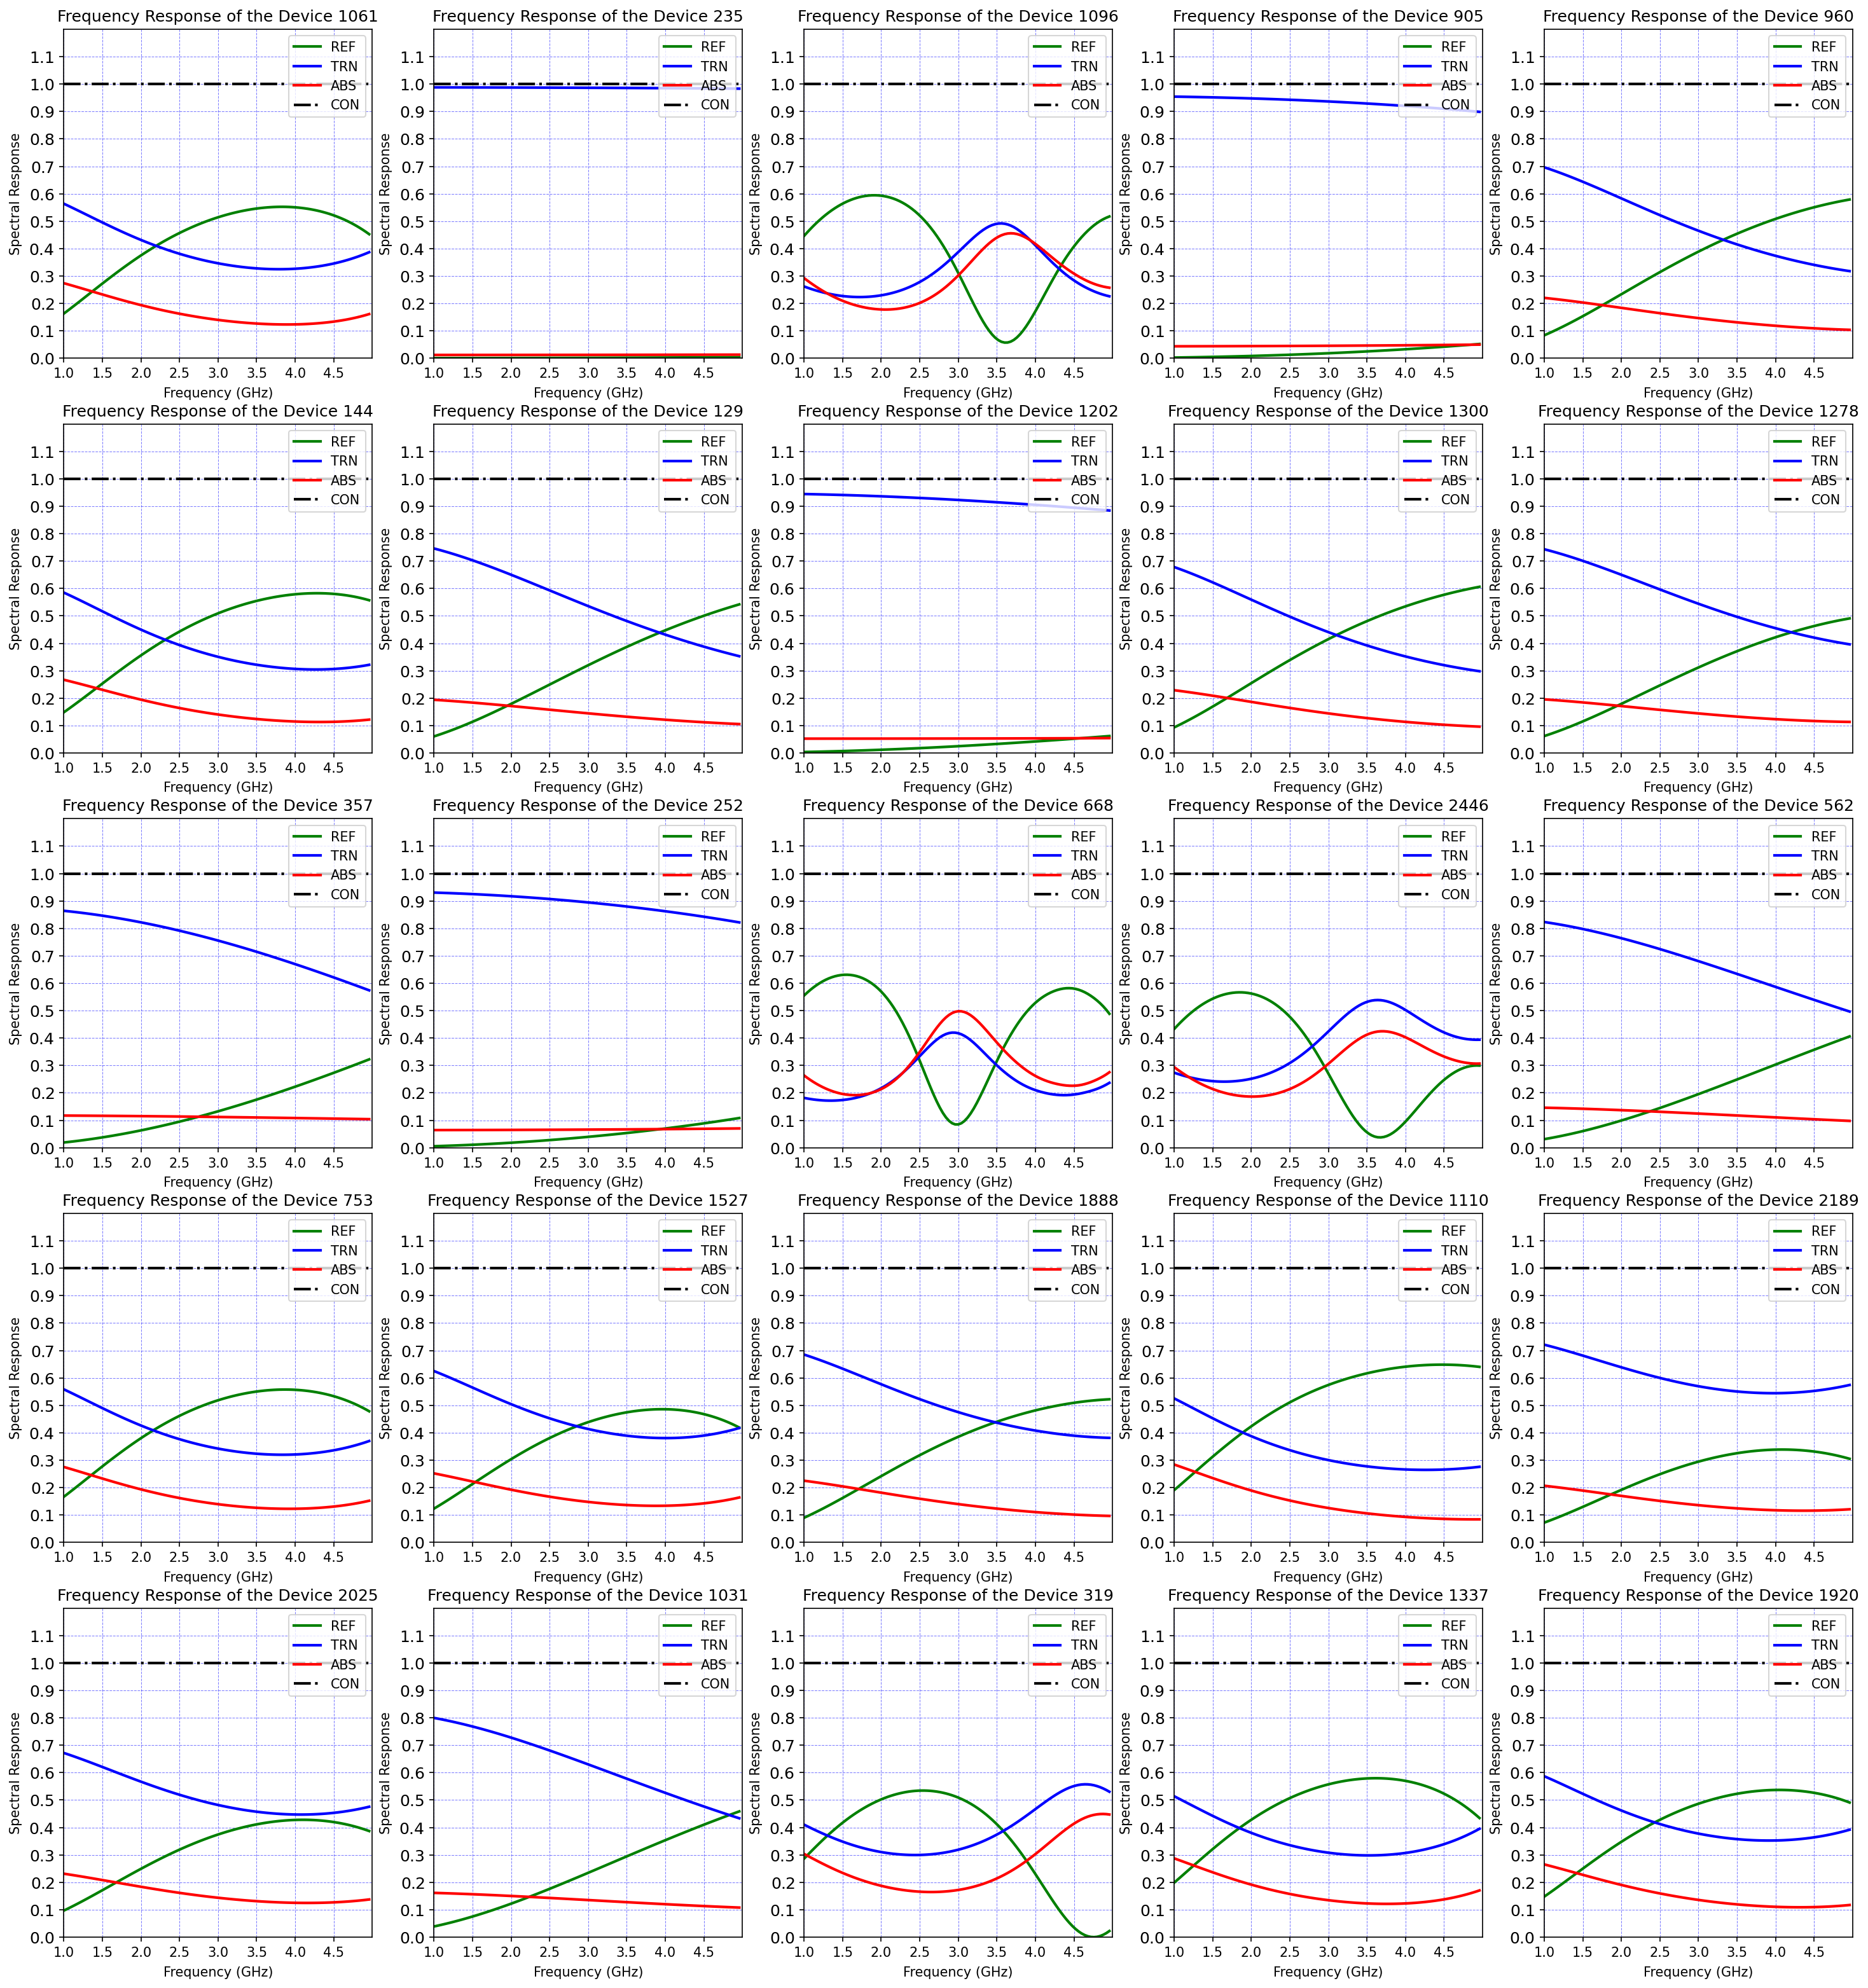

[1061, 235, 1096, 905, 960, 144, 129, 1202, 1300, 1278, 357, 252, 668, 2446, 562, 753, 1527, 1888, 1110, 2189, 2025, 1031, 319, 1337, 1920]
Number of seconds elapsed: 1.9672753000000043 seconds
Number of minutes elapsed: 0.03278792166666674 minutes
Number of hours elapsed: 0.0005464653611111124 hours


In [7]:
################################################
## PLOTTING PARAMETERS - TRAINING SET
################################################
# Setclock
start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

imageIndex_list = []

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, REF[imageIndex,:], color ='green'   , lw=2,  ls='-', label = 'REF')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, TRN[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, ABS[imageIndex,:], color ='red' , lw=2,  ls='-', label = 'ABS')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, CON[imageIndex,:], color ='black' , lw=2,  ls='-.', label = 'CON')

    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex))
    axes[x_plot, y_plot].legend(loc=1)
 

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    
    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

    imageIndex_list.append(imageIndex)

plt.show()

print(imageIndex_list)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

<Figure size 432x288 with 0 Axes>

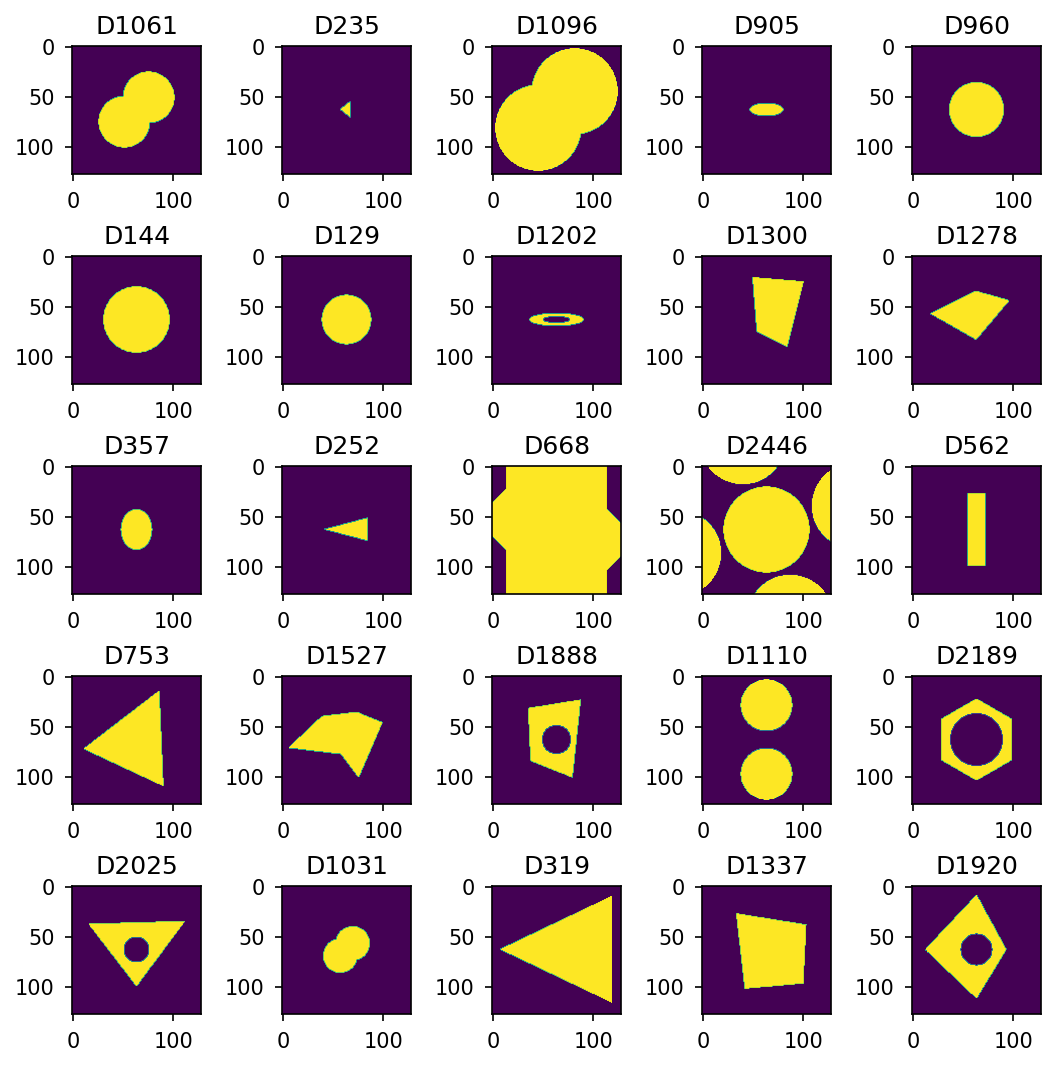

Number of seconds elapsed: 0.9206269999999961 seconds
Number of minutes elapsed: 0.015343783333333269 minutes
Number of hours elapsed: 0.00025572972222222116 hours


In [8]:
################################################
## DISPLAY IMAGE
################################################

start = timer()

plot_row = 5
plot_column = 5
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row, ncols = plot_column, figsize = (7,7), dpi = 150, constrained_layout=True) 

counter_for_image = 0
for x_plot in range(plot_row):
  for y_plot in range(plot_column):
    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = imageIndex_list[counter_for_image]
    axes[x_plot,y_plot].imshow(DEV_ER[imageIndex].reshape((DEV_ER.shape[1],DEV_ER.shape[1])).T) #display sample training image
    axes[x_plot,y_plot].set_title('D'+ str(imageIndex))
    counter_for_image += 1
plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [9]:
################################################
## ASSIGN TRAINING SET DATA
################################################

start = timer()

import random
# Shuffling of the data pairs
data_indices = list(np.sort(spec_index))
#print(data_indices)
shuffled_indices = random.sample(data_indices,len(data_indices))
#print(shuffled_indices)

# Data Splitting
trainPercentage = int(0.90*len(spec_index))
testPercentage = int(0.10*len(spec_index))

print("Number of Training Samples" + str(trainPercentage))
print("Number of Validation Samples" + str(testPercentage))

list_choice = shuffled_indices

DEV_ER_TRAIN    = DEV_ER[list_choice[0:trainPercentage]][:]  
DEV_ER_VAL      = DEV_ER[list_choice[trainPercentage+1:trainPercentage+testPercentage]][:]

REF_TRAIN       = REF[list_choice[0:trainPercentage]][:]  
REF_VAL         = REF[list_choice[trainPercentage+1:trainPercentage+testPercentage]][:]
    
print(DEV_ER_TRAIN[:].shape)
print(DEV_ER_VAL[:].shape)

print(REF_TRAIN[:].shape)
print(REF_VAL[:].shape)

# Normalize image vectors
X_train = DEV_ER_TRAIN
X_val   = DEV_ER_VAL

# Reshape
Y_train = REF_TRAIN
Y_val   = REF_VAL


print ("number of training examples = " + str(X_train.shape[0]))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("Y_val shape: " + str(Y_val.shape))

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

Number of Training Samples2205
Number of Validation Samples245
(2205, 128, 128, 1)
(244, 128, 128, 1)
(2205, 100)
(244, 100)
number of training examples = 2205
X_train shape: (2205, 128, 128, 1)
Y_train shape: (2205, 100)
X_val shape: (244, 128, 128, 1)
Y_val shape: (244, 100)
Number of seconds elapsed: 0.07198749999999166 seconds
Number of minutes elapsed: 0.0011997916666665275 minutes
Number of hours elapsed: 1.999652777777546e-05 hours


In [29]:
################################################
## CREATE THE MACHINE LEARNING ALGORITHM
################################################

start = timer()

def SpectralModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 1
            tfl.InputLayer(input_shape = (128,128,1)),
            tfl.ZeroPadding2D(padding=3),
            ## Conv2D
            tfl.Conv2D(32, (3,3), strides = 1, activation = None, padding = 'same'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            # Conv2D
            tfl.Conv2D(64, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            tfl.Conv2D(128, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            # Conv2D
            tfl.Conv2D(128, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            tfl.Conv2D(256, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            # Conv2D
            tfl.Conv2D(256, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            
            tfl.Conv2D(512, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
        
            tfl.Conv2D(1028, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            
            
            ## Flatten layer
            tfl.Flatten(),
            tfl.Dense(units = 4096, activation = None),
            tfl.ReLU(),
            tfl.Dropout(0.5),
            tfl.Dense(units = 2048, activation = None),
            tfl.ReLU(),
            tfl.Dropout(0.5),
            tfl.Dense(units = 1024, activation = None),
            tfl.ReLU(),
            tfl.Dropout(0.5),
            tfl.Dense(units = 512, activation = None),
            tfl.ReLU(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(units = 100, activation = 'sigmoid')
            # YOUR CODE STARTS HERE
            # YOUR CODE ENDS HERE
        ])
    return model

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

Number of seconds elapsed: 0.0002206000000342101 seconds
Number of minutes elapsed: 3.676666667236835e-06 minutes
Number of hours elapsed: 6.127777778728058e-08 hours


In [30]:
################################################
## MODEL SUMMARY
################################################

start = timer()

Spectral_Model = SpectralModel()

def summary(model):
    model.compile(optimizer='adam',
                  loss='mean_square_error',
                  metrics=['accuracy'])
    result = []
    for layer in model.layers:
        descriptors = [layer.__class__.__name__, layer.output_shape, layer.count_params()]
        if (type(layer) == Conv2D):
            descriptors.append(layer.padding)
            descriptors.append(layer.activation.__name__)
            descriptors.append(layer.kernel_initializer.__class__.__name__)
        if (type(layer) == MaxPooling2D):
            descriptors.append(layer.pool_size)
            descriptors.append(layer.strides)
            descriptors.append(layer.padding)
        if (type(layer) == Dropout):
            descriptors.append(layer.rate)
        if (type(layer) == ZeroPadding2D):
            descriptors.append(layer.padding)
        if (type(layer) == Dense):
            descriptors.append(layer.activation.__name__)
        result.append(descriptors)
    return result

# Print a summary for each layer
for layer in summary(Spectral_Model):
    print(layer)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['ZeroPadding2D', (None, 134, 134, 1), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 134, 134, 32), 320, 'same', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 134, 134, 32), 128]
['ReLU', (None, 134, 134, 32), 0]
['Conv2D', (None, 132, 132, 64), 18496, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 132, 132, 64), 256]
['ReLU', (None, 132, 132, 64), 0]
['MaxPooling2D', (None, 66, 66, 64), 0, (2, 2), (2, 2), 'valid']
['Dropout', (None, 66, 66, 64), 0, 0.5]
['Conv2D', (None, 64, 64, 128), 73856, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 128), 512]
['ReLU', (None, 64, 64, 128), 0]
['Conv2D', (None, 62, 62, 128), 147584, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 62, 62, 128), 512]
['ReLU', (None, 62, 62, 128), 0]
['MaxPooling2D', (None, 31, 31, 128), 0, (2, 2), (2, 2), 'valid']
['Dropout', (None, 31, 31, 128), 0, 0.5]
['Conv2D', (None, 29, 29, 256), 295168, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization

In [31]:
################################################
## COMPILE THE MODEL
################################################

start = timer()

Spectral_Model.compile(optimizer='adam',
                   loss='mean_squared_error',
                   metrics=['accuracy'])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

Number of seconds elapsed: 0.003245800000058807 seconds
Number of minutes elapsed: 5.4096666667646785e-05 minutes
Number of hours elapsed: 9.016111111274464e-07 hours


In [32]:
Spectral_Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 134, 134, 1)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 134, 134, 32)      320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 134, 134, 32)      128       
_________________________________________________________________
re_lu_32 (ReLU)              (None, 134, 134, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 132, 132, 64)      18496     
_________________________________________________________________
batch_normalization_21 (Batc (None, 132, 132, 64)      256       
_________________________________________________________________
re_lu_33 (ReLU)              (None, 132, 132, 64)     

In [34]:
################################################
## MODEL TRAINING
################################################
start = timer()
SM = Spectral_Model.fit(X_train, Y_train, epochs=5000, batch_size=64)
end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60//60) + " hours")

Epoch 1/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5433e-04 - accuracy: 0.5351
Epoch 2/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4061e-04 - accuracy: 0.5324
Epoch 3/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5975e-04 - accuracy: 0.5306
Epoch 4/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8798e-04 - accuracy: 0.5333
Epoch 5/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0011e-04 - accuracy: 0.5410
Epoch 6/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8796e-04 - accuracy: 0.5247
Epoch 7/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5555e-04 - accuracy: 0.5342
Epoch 8/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5925e-04 - accuracy: 0.5551
Epoch 9/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2661e-04 - accuracy: 0.5361
Epoch 10/5000
35/35 [=========================

35/35 [==============================] - 4s 116ms/step - loss: 2.2544e-04 - accuracy: 0.5488
Epoch 78/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.2830e-04 - accuracy: 0.5315
Epoch 79/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4597e-04 - accuracy: 0.5501
Epoch 80/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.2583e-04 - accuracy: 0.5338
Epoch 81/5000
35/35 [==============================] - 4s 119ms/step - loss: 2.5885e-04 - accuracy: 0.5370
Epoch 82/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.5588e-04 - accuracy: 0.5338
Epoch 83/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8504e-04 - accuracy: 0.5238
Epoch 84/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7007e-04 - accuracy: 0.5406
Epoch 85/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.1670e-04 - accuracy: 0.5274
Epoch 86/5000
35/35 [==============================

35/35 [==============================] - 4s 116ms/step - loss: 2.2004e-04 - accuracy: 0.5442
Epoch 154/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3044e-04 - accuracy: 0.5497
Epoch 155/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2662e-04 - accuracy: 0.5456
Epoch 156/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2440e-04 - accuracy: 0.5420
Epoch 157/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1854e-04 - accuracy: 0.5397
Epoch 158/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3452e-04 - accuracy: 0.5433
Epoch 159/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3994e-04 - accuracy: 0.5288
Epoch 160/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2534e-04 - accuracy: 0.5370
Epoch 161/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3426e-04 - accuracy: 0.5460
Epoch 162/5000
35/35 [=====================

Epoch 229/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4208e-04 - accuracy: 0.5329
Epoch 230/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5820e-04 - accuracy: 0.5524
Epoch 231/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8309e-04 - accuracy: 0.5297
Epoch 232/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6191e-04 - accuracy: 0.5202
Epoch 233/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4579e-04 - accuracy: 0.5469
Epoch 234/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4263e-04 - accuracy: 0.5324
Epoch 235/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4974e-04 - accuracy: 0.5442
Epoch 236/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5960e-04 - accuracy: 0.5311
Epoch 237/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3902e-04 - accuracy: 0.5324
Epoch 238/5000
35/35 [======

35/35 [==============================] - 4s 116ms/step - loss: 2.3442e-04 - accuracy: 0.5501
Epoch 305/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2356e-04 - accuracy: 0.5320
Epoch 306/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4002e-04 - accuracy: 0.5474
Epoch 307/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3884e-04 - accuracy: 0.5465
Epoch 308/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5846e-04 - accuracy: 0.5347
Epoch 309/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4161e-04 - accuracy: 0.5483
Epoch 310/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3846e-04 - accuracy: 0.5388
Epoch 311/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2459e-04 - accuracy: 0.5392
Epoch 312/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2054e-04 - accuracy: 0.5451
Epoch 313/5000
35/35 [=====================

Epoch 380/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4129e-04 - accuracy: 0.5392
Epoch 381/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3969e-04 - accuracy: 0.5501
Epoch 382/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5668e-04 - accuracy: 0.5365
Epoch 383/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1743e-04 - accuracy: 0.5451
Epoch 384/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3301e-04 - accuracy: 0.5442
Epoch 385/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4592e-04 - accuracy: 0.5415
Epoch 386/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3476e-04 - accuracy: 0.5365
Epoch 387/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4643e-04 - accuracy: 0.5410
Epoch 388/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2841e-04 - accuracy: 0.5451
Epoch 389/5000
35/35 [======

35/35 [==============================] - 4s 116ms/step - loss: 2.0735e-04 - accuracy: 0.5646
Epoch 456/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1892e-04 - accuracy: 0.5401
Epoch 457/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0907e-04 - accuracy: 0.5447
Epoch 458/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3501e-04 - accuracy: 0.5515
Epoch 459/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7493e-04 - accuracy: 0.5361
Epoch 460/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8025e-04 - accuracy: 0.5243
Epoch 461/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.3671e-04 - accuracy: 0.5401
Epoch 462/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3015e-04 - accuracy: 0.5456
Epoch 463/5000
35/35 [==============================] - 4s 119ms/step - loss: 2.4522e-04 - accuracy: 0.5374
Epoch 464/5000
35/35 [=====================

Epoch 531/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0457e-04 - accuracy: 0.5447
Epoch 532/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5544e-04 - accuracy: 0.5383
Epoch 533/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4128e-04 - accuracy: 0.5283
Epoch 534/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.5609e-04 - accuracy: 0.5388
Epoch 535/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0990e-04 - accuracy: 0.5692
Epoch 536/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4253e-04 - accuracy: 0.5224
Epoch 537/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4893e-04 - accuracy: 0.5342
Epoch 538/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6960e-04 - accuracy: 0.5220
Epoch 539/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3423e-04 - accuracy: 0.5329
Epoch 540/5000
35/35 [======

35/35 [==============================] - 4s 116ms/step - loss: 2.4122e-04 - accuracy: 0.5401
Epoch 607/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3748e-04 - accuracy: 0.5361
Epoch 608/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.3431e-04 - accuracy: 0.5388
Epoch 609/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2152e-04 - accuracy: 0.5392
Epoch 610/5000
35/35 [==============================] - 4s 118ms/step - loss: 2.1418e-04 - accuracy: 0.5274
Epoch 611/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2155e-04 - accuracy: 0.5315
Epoch 612/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4461e-04 - accuracy: 0.5488
Epoch 613/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5438e-04 - accuracy: 0.5401
Epoch 614/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3728e-04 - accuracy: 0.5392
Epoch 615/5000
35/35 [=====================

Epoch 682/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5632e-04 - accuracy: 0.5438
Epoch 683/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3586e-04 - accuracy: 0.5302
Epoch 684/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5703e-04 - accuracy: 0.5410
Epoch 685/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1145e-04 - accuracy: 0.5261
Epoch 686/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4941e-04 - accuracy: 0.5224
Epoch 687/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4138e-04 - accuracy: 0.5265
Epoch 688/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6377e-04 - accuracy: 0.5361
Epoch 689/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8579e-04 - accuracy: 0.5565
Epoch 690/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7293e-04 - accuracy: 0.5329
Epoch 691/5000
35/35 [======

35/35 [==============================] - 4s 119ms/step - loss: 2.2382e-04 - accuracy: 0.5542
Epoch 758/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3679e-04 - accuracy: 0.5342
Epoch 759/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1674e-04 - accuracy: 0.5283
Epoch 760/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4089e-04 - accuracy: 0.5429
Epoch 761/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2212e-04 - accuracy: 0.5519
Epoch 762/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4823e-04 - accuracy: 0.5533
Epoch 763/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3692e-04 - accuracy: 0.5451
Epoch 764/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0464e-04 - accuracy: 0.5438
Epoch 765/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1386e-04 - accuracy: 0.5397
Epoch 766/5000
35/35 [=====================

Epoch 833/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2032e-04 - accuracy: 0.5456
Epoch 834/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6865e-04 - accuracy: 0.5374
Epoch 835/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4964e-04 - accuracy: 0.5465
Epoch 836/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3088e-04 - accuracy: 0.5483
Epoch 837/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5091e-04 - accuracy: 0.5528
Epoch 838/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5064e-04 - accuracy: 0.5361
Epoch 839/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2921e-04 - accuracy: 0.5238
Epoch 840/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6054e-04 - accuracy: 0.5410
Epoch 841/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4077e-04 - accuracy: 0.5315
Epoch 842/5000
35/35 [======

35/35 [==============================] - 4s 116ms/step - loss: 2.3638e-04 - accuracy: 0.5442
Epoch 909/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3586e-04 - accuracy: 0.5492
Epoch 910/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2223e-04 - accuracy: 0.5460
Epoch 911/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3484e-04 - accuracy: 0.5524
Epoch 912/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4152e-04 - accuracy: 0.5388
Epoch 913/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0195e-04 - accuracy: 0.5501
Epoch 914/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0806e-04 - accuracy: 0.5415
Epoch 915/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2180e-04 - accuracy: 0.5533
Epoch 916/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1764e-04 - accuracy: 0.5519
Epoch 917/5000
35/35 [=====================

Epoch 984/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0661e-04 - accuracy: 0.5533
Epoch 985/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3680e-04 - accuracy: 0.5524
Epoch 986/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2311e-04 - accuracy: 0.5501
Epoch 987/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3404e-04 - accuracy: 0.5338
Epoch 988/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1188e-04 - accuracy: 0.5510
Epoch 989/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3221e-04 - accuracy: 0.5488
Epoch 990/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.3290e-04 - accuracy: 0.5506
Epoch 991/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2154e-04 - accuracy: 0.5542
Epoch 992/5000
35/35 [==============================] - 4s 120ms/step - loss: 2.5076e-04 - accuracy: 0.5433
Epoch 993/5000
35/35 [======

35/35 [==============================] - 4s 116ms/step - loss: 2.6254e-04 - accuracy: 0.5483
Epoch 1060/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3640e-04 - accuracy: 0.5565
Epoch 1061/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5401e-04 - accuracy: 0.5370
Epoch 1062/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4906e-04 - accuracy: 0.5370
Epoch 1063/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3138e-04 - accuracy: 0.5524
Epoch 1064/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4297e-04 - accuracy: 0.5379
Epoch 1065/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7205e-04 - accuracy: 0.5324
Epoch 1066/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1953e-04 - accuracy: 0.5533
Epoch 1067/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6303e-04 - accuracy: 0.5247
Epoch 1068/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.2718e-04 - accuracy: 0.5451
Epoch 1135/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3099e-04 - accuracy: 0.5397
Epoch 1136/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4461e-04 - accuracy: 0.5356
Epoch 1137/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.5698e-04 - accuracy: 0.5356
Epoch 1138/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5326e-04 - accuracy: 0.5474
Epoch 1139/5000
35/35 [==============================] - 4s 120ms/step - loss: 2.4612e-04 - accuracy: 0.5293
Epoch 1140/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5268e-04 - accuracy: 0.5338
Epoch 1141/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2944e-04 - accuracy: 0.5420
Epoch 1142/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1770e-04 - accuracy: 0.5392
Epoch 1143/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.1253e-04 - accuracy: 0.5673
Epoch 1210/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2102e-04 - accuracy: 0.5556
Epoch 1211/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2003e-04 - accuracy: 0.5596
Epoch 1212/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0740e-04 - accuracy: 0.5488
Epoch 1213/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2538e-04 - accuracy: 0.5519
Epoch 1214/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0833e-04 - accuracy: 0.5592
Epoch 1215/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5871e-04 - accuracy: 0.5438
Epoch 1216/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5387e-04 - accuracy: 0.5315
Epoch 1217/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2096e-04 - accuracy: 0.5397
Epoch 1218/5000
35/35 [============

35/35 [==============================] - 4s 117ms/step - loss: 2.1949e-04 - accuracy: 0.5410
Epoch 1285/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6994e-04 - accuracy: 0.5356
Epoch 1286/5000
35/35 [==============================] - 4s 120ms/step - loss: 2.3626e-04 - accuracy: 0.5533
Epoch 1287/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5992e-04 - accuracy: 0.5293
Epoch 1288/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3996e-04 - accuracy: 0.5433
Epoch 1289/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3482e-04 - accuracy: 0.5619
Epoch 1290/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2988e-04 - accuracy: 0.5469
Epoch 1291/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7999e-04 - accuracy: 0.5533
Epoch 1292/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5645e-04 - accuracy: 0.5347
Epoch 1293/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.2903e-04 - accuracy: 0.5524
Epoch 1360/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5835e-04 - accuracy: 0.5315
Epoch 1361/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3780e-04 - accuracy: 0.5365
Epoch 1362/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4782e-04 - accuracy: 0.5388
Epoch 1363/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1501e-04 - accuracy: 0.5596
Epoch 1364/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2327e-04 - accuracy: 0.5569
Epoch 1365/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1212e-04 - accuracy: 0.5587
Epoch 1366/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1911e-04 - accuracy: 0.5410
Epoch 1367/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2700e-04 - accuracy: 0.5592
Epoch 1368/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.3836e-04 - accuracy: 0.5460
Epoch 1435/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1280e-04 - accuracy: 0.5433
Epoch 1436/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2524e-04 - accuracy: 0.5528
Epoch 1437/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0528e-04 - accuracy: 0.5311
Epoch 1438/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0789e-04 - accuracy: 0.5510
Epoch 1439/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0198e-04 - accuracy: 0.5524
Epoch 1440/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8860e-04 - accuracy: 0.5401
Epoch 1441/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6597e-04 - accuracy: 0.5497
Epoch 1442/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3270e-04 - accuracy: 0.5424
Epoch 1443/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.2296e-04 - accuracy: 0.5615
Epoch 1510/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3794e-04 - accuracy: 0.5392
Epoch 1511/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4367e-04 - accuracy: 0.5383
Epoch 1512/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1770e-04 - accuracy: 0.5361
Epoch 1513/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6143e-04 - accuracy: 0.5420
Epoch 1514/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2098e-04 - accuracy: 0.5397
Epoch 1515/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7609e-04 - accuracy: 0.5483
Epoch 1516/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1610e-04 - accuracy: 0.5492
Epoch 1517/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9385e-04 - accuracy: 0.5356
Epoch 1518/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.5246e-04 - accuracy: 0.5206
Epoch 1585/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3692e-04 - accuracy: 0.5429
Epoch 1586/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2788e-04 - accuracy: 0.5483
Epoch 1587/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0680e-04 - accuracy: 0.5392
Epoch 1588/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0638e-04 - accuracy: 0.5469
Epoch 1589/5000
35/35 [==============================] - 4s 116ms/step - loss: 1.9916e-04 - accuracy: 0.5438
Epoch 1590/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1232e-04 - accuracy: 0.5642
Epoch 1591/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2671e-04 - accuracy: 0.5465
Epoch 1592/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4693e-04 - accuracy: 0.5438
Epoch 1593/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.2396e-04 - accuracy: 0.5270
Epoch 1660/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.8782e-04 - accuracy: 0.5252
Epoch 1661/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.3832e-04 - accuracy: 0.5306
Epoch 1662/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0403e-04 - accuracy: 0.5147
Epoch 1663/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5916e-04 - accuracy: 0.5447
Epoch 1664/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8522e-04 - accuracy: 0.5265
Epoch 1665/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5036e-04 - accuracy: 0.5293
Epoch 1666/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4433e-04 - accuracy: 0.5347
Epoch 1667/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.8639e-04 - accuracy: 0.5424
Epoch 1668/5000
35/35 [============

35/35 [==============================] - 4s 117ms/step - loss: 2.6779e-04 - accuracy: 0.5329
Epoch 1735/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6018e-04 - accuracy: 0.5293
Epoch 1736/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5473e-04 - accuracy: 0.5451
Epoch 1737/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5112e-04 - accuracy: 0.5365
Epoch 1738/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6191e-04 - accuracy: 0.5451
Epoch 1739/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.1548e-04 - accuracy: 0.5397
Epoch 1740/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.1725e-04 - accuracy: 0.5497
Epoch 1741/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1798e-04 - accuracy: 0.5528
Epoch 1742/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1995e-04 - accuracy: 0.5410
Epoch 1743/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.5851e-04 - accuracy: 0.5383
Epoch 1810/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3618e-04 - accuracy: 0.5388
Epoch 1811/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3243e-04 - accuracy: 0.5374
Epoch 1812/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4404e-04 - accuracy: 0.5492
Epoch 1813/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.8458e-04 - accuracy: 0.5338
Epoch 1814/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7887e-04 - accuracy: 0.5274
Epoch 1815/5000
35/35 [==============================] - 4s 120ms/step - loss: 2.7251e-04 - accuracy: 0.5515
Epoch 1816/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7361e-04 - accuracy: 0.5274
Epoch 1817/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3039e-04 - accuracy: 0.5365
Epoch 1818/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.1497e-04 - accuracy: 0.5497
Epoch 1885/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3533e-04 - accuracy: 0.5474
Epoch 1886/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.8158e-04 - accuracy: 0.5401
Epoch 1887/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7419e-04 - accuracy: 0.5333
Epoch 1888/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4136e-04 - accuracy: 0.5379
Epoch 1889/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0651e-04 - accuracy: 0.5420
Epoch 1890/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5245e-04 - accuracy: 0.5528
Epoch 1891/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0224e-04 - accuracy: 0.5601
Epoch 1892/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5289e-04 - accuracy: 0.5501
Epoch 1893/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.1595e-04 - accuracy: 0.5442
Epoch 1960/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4837e-04 - accuracy: 0.5447
Epoch 1961/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.3059e-04 - accuracy: 0.5193
Epoch 1962/5000
35/35 [==============================] - 4s 120ms/step - loss: 2.5342e-04 - accuracy: 0.5492
Epoch 1963/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1544e-04 - accuracy: 0.5506
Epoch 1964/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2816e-04 - accuracy: 0.5537
Epoch 1965/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9759e-04 - accuracy: 0.5356
Epoch 1966/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3813e-04 - accuracy: 0.5329
Epoch 1967/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8676e-04 - accuracy: 0.5338
Epoch 1968/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.5010e-04 - accuracy: 0.5442
Epoch 2035/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1619e-04 - accuracy: 0.5546
Epoch 2036/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6258e-04 - accuracy: 0.5420
Epoch 2037/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0169e-04 - accuracy: 0.5206
Epoch 2038/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2019e-04 - accuracy: 0.5410
Epoch 2039/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4703e-04 - accuracy: 0.5515
Epoch 2040/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6146e-04 - accuracy: 0.5456
Epoch 2041/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1943e-04 - accuracy: 0.5551
Epoch 2042/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0062e-04 - accuracy: 0.5533
Epoch 2043/5000
35/35 [============

35/35 [==============================] - 4s 120ms/step - loss: 2.7583e-04 - accuracy: 0.5401
Epoch 2110/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4638e-04 - accuracy: 0.5383
Epoch 2111/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5800e-04 - accuracy: 0.5315
Epoch 2112/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4870e-04 - accuracy: 0.5370
Epoch 2113/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1752e-04 - accuracy: 0.5451
Epoch 2114/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4972e-04 - accuracy: 0.5374
Epoch 2115/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1820e-04 - accuracy: 0.5429
Epoch 2116/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0970e-04 - accuracy: 0.5374
Epoch 2117/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4157e-04 - accuracy: 0.5465
Epoch 2118/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.7707e-04 - accuracy: 0.5324
Epoch 2185/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7345e-04 - accuracy: 0.5565
Epoch 2186/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7227e-04 - accuracy: 0.5288
Epoch 2187/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5916e-04 - accuracy: 0.5524
Epoch 2188/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4796e-04 - accuracy: 0.5433
Epoch 2189/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7925e-04 - accuracy: 0.5333
Epoch 2190/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7129e-04 - accuracy: 0.5374
Epoch 2191/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5847e-04 - accuracy: 0.5424
Epoch 2192/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5210e-04 - accuracy: 0.5410
Epoch 2193/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.4403e-04 - accuracy: 0.5556
Epoch 2260/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5424e-04 - accuracy: 0.5510
Epoch 2261/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4633e-04 - accuracy: 0.5474
Epoch 2262/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3189e-04 - accuracy: 0.5306
Epoch 2263/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2670e-04 - accuracy: 0.5528
Epoch 2264/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7149e-04 - accuracy: 0.5474
Epoch 2265/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3772e-04 - accuracy: 0.5374
Epoch 2266/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6468e-04 - accuracy: 0.5542
Epoch 2267/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5856e-04 - accuracy: 0.5515
Epoch 2268/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.3492e-04 - accuracy: 0.5383
Epoch 2335/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2414e-04 - accuracy: 0.5442
Epoch 2336/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3747e-04 - accuracy: 0.5374
Epoch 2337/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3182e-04 - accuracy: 0.5515
Epoch 2338/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4065e-04 - accuracy: 0.5370
Epoch 2339/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4291e-04 - accuracy: 0.5351
Epoch 2340/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3240e-04 - accuracy: 0.5383
Epoch 2341/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9677e-04 - accuracy: 0.5356
Epoch 2342/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.3718e-04 - accuracy: 0.5410
Epoch 2343/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.5142e-04 - accuracy: 0.5510
Epoch 2410/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1562e-04 - accuracy: 0.5542
Epoch 2411/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0831e-04 - accuracy: 0.5447
Epoch 2412/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4244e-04 - accuracy: 0.5456
Epoch 2413/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2186e-04 - accuracy: 0.5374
Epoch 2414/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0390e-04 - accuracy: 0.5488
Epoch 2415/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4075e-04 - accuracy: 0.5438
Epoch 2416/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6550e-04 - accuracy: 0.5537
Epoch 2417/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.0489e-04 - accuracy: 0.5460
Epoch 2418/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.8515e-04 - accuracy: 0.5379
Epoch 2485/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6752e-04 - accuracy: 0.5397
Epoch 2486/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5899e-04 - accuracy: 0.5424
Epoch 2487/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9981e-04 - accuracy: 0.5356
Epoch 2488/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7421e-04 - accuracy: 0.5583
Epoch 2489/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.2572e-04 - accuracy: 0.5673
Epoch 2490/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5275e-04 - accuracy: 0.5451
Epoch 2491/5000
35/35 [==============================] - 4s 120ms/step - loss: 2.2024e-04 - accuracy: 0.5469
Epoch 2492/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2595e-04 - accuracy: 0.5592
Epoch 2493/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.6430e-04 - accuracy: 0.5465
Epoch 2560/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3600e-04 - accuracy: 0.5510
Epoch 2561/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3687e-04 - accuracy: 0.5460
Epoch 2562/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.3134e-04 - accuracy: 0.5447
Epoch 2563/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9807e-04 - accuracy: 0.5324
Epoch 2564/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3059e-04 - accuracy: 0.5270
Epoch 2565/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4029e-04 - accuracy: 0.5478
Epoch 2566/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6555e-04 - accuracy: 0.5506
Epoch 2567/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4543e-04 - accuracy: 0.5469
Epoch 2568/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.6447e-04 - accuracy: 0.5197
Epoch 2635/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6526e-04 - accuracy: 0.5388
Epoch 2636/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.8192e-04 - accuracy: 0.5506
Epoch 2637/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5301e-04 - accuracy: 0.5388
Epoch 2638/5000
35/35 [==============================] - 4s 119ms/step - loss: 3.0411e-04 - accuracy: 0.5265
Epoch 2639/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0851e-04 - accuracy: 0.5270
Epoch 2640/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6623e-04 - accuracy: 0.5506
Epoch 2641/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7198e-04 - accuracy: 0.5379
Epoch 2642/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1021e-04 - accuracy: 0.5361
Epoch 2643/5000
35/35 [============

35/35 [==============================] - 4s 117ms/step - loss: 3.1952e-04 - accuracy: 0.5243
Epoch 2710/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9200e-04 - accuracy: 0.5184
Epoch 2711/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4039e-04 - accuracy: 0.5265
Epoch 2712/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4578e-04 - accuracy: 0.5406
Epoch 2713/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1224e-04 - accuracy: 0.5252
Epoch 2714/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2244e-04 - accuracy: 0.5501
Epoch 2715/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3504e-04 - accuracy: 0.5601
Epoch 2716/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3793e-04 - accuracy: 0.5519
Epoch 2717/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5731e-04 - accuracy: 0.5288
Epoch 2718/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.9097e-04 - accuracy: 0.5347
Epoch 2785/5000
35/35 [==============================] - 4s 119ms/step - loss: 2.5555e-04 - accuracy: 0.5410
Epoch 2786/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5412e-04 - accuracy: 0.5506
Epoch 2787/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4274e-04 - accuracy: 0.5401
Epoch 2788/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7009e-04 - accuracy: 0.5311
Epoch 2789/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3851e-04 - accuracy: 0.5488
Epoch 2790/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4072e-04 - accuracy: 0.5451
Epoch 2791/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2393e-04 - accuracy: 0.5415
Epoch 2792/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7723e-04 - accuracy: 0.5429
Epoch 2793/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.2829e-04 - accuracy: 0.5546
Epoch 2860/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6242e-04 - accuracy: 0.5442
Epoch 2861/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7892e-04 - accuracy: 0.5465
Epoch 2862/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6006e-04 - accuracy: 0.5338
Epoch 2863/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5044e-04 - accuracy: 0.5442
Epoch 2864/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2521e-04 - accuracy: 0.5628
Epoch 2865/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7364e-04 - accuracy: 0.5306
Epoch 2866/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7370e-04 - accuracy: 0.5374
Epoch 2867/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8144e-04 - accuracy: 0.5447
Epoch 2868/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.6807e-04 - accuracy: 0.5519
Epoch 2935/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.7747e-04 - accuracy: 0.5138
Epoch 2936/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9805e-04 - accuracy: 0.5306
Epoch 2937/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5410e-04 - accuracy: 0.5338
Epoch 2938/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5784e-04 - accuracy: 0.5365
Epoch 2939/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5853e-04 - accuracy: 0.5351
Epoch 2940/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7460e-04 - accuracy: 0.5392
Epoch 2941/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6163e-04 - accuracy: 0.5447
Epoch 2942/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9725e-04 - accuracy: 0.5420
Epoch 2943/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.4353e-04 - accuracy: 0.5460
Epoch 3010/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7692e-04 - accuracy: 0.5483
Epoch 3011/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7067e-04 - accuracy: 0.5465
Epoch 3012/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4126e-04 - accuracy: 0.5392
Epoch 3013/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2713e-04 - accuracy: 0.5478
Epoch 3014/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6973e-04 - accuracy: 0.5488
Epoch 3015/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2354e-04 - accuracy: 0.5478
Epoch 3016/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2797e-04 - accuracy: 0.5406
Epoch 3017/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6029e-04 - accuracy: 0.5519
Epoch 3018/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.5710e-04 - accuracy: 0.5546
Epoch 3085/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4726e-04 - accuracy: 0.5528
Epoch 3086/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8201e-04 - accuracy: 0.5397
Epoch 3087/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7149e-04 - accuracy: 0.5451
Epoch 3088/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4662e-04 - accuracy: 0.5551
Epoch 3089/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1106e-04 - accuracy: 0.5333
Epoch 3090/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5154e-04 - accuracy: 0.5351
Epoch 3091/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3965e-04 - accuracy: 0.5451
Epoch 3092/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6302e-04 - accuracy: 0.5510
Epoch 3093/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.0512e-04 - accuracy: 0.5211
Epoch 3160/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.6036e-04 - accuracy: 0.5134
Epoch 3161/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5173e-04 - accuracy: 0.5356
Epoch 3162/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.2518e-04 - accuracy: 0.5415
Epoch 3163/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1172e-04 - accuracy: 0.5433
Epoch 3164/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4440e-04 - accuracy: 0.5356
Epoch 3165/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.4895e-04 - accuracy: 0.5519
Epoch 3166/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.1213e-04 - accuracy: 0.5383
Epoch 3167/5000
35/35 [==============================] - 4s 119ms/step - loss: 2.4489e-04 - accuracy: 0.5478
Epoch 3168/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.7645e-04 - accuracy: 0.5342
Epoch 3235/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2442e-04 - accuracy: 0.5442
Epoch 3236/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.2559e-04 - accuracy: 0.5184
Epoch 3237/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8196e-04 - accuracy: 0.5351
Epoch 3238/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7446e-04 - accuracy: 0.5438
Epoch 3239/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1318e-04 - accuracy: 0.5365
Epoch 3240/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5281e-04 - accuracy: 0.5338
Epoch 3241/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8569e-04 - accuracy: 0.5388
Epoch 3242/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5977e-04 - accuracy: 0.5456
Epoch 3243/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.6994e-04 - accuracy: 0.5374
Epoch 3310/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8292e-04 - accuracy: 0.5488
Epoch 3311/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4863e-04 - accuracy: 0.5497
Epoch 3312/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.5663e-04 - accuracy: 0.5528
Epoch 3313/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5256e-04 - accuracy: 0.5556
Epoch 3314/5000
35/35 [==============================] - 4s 119ms/step - loss: 3.1549e-04 - accuracy: 0.5175
Epoch 3315/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.8231e-04 - accuracy: 0.5293
Epoch 3316/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6218e-04 - accuracy: 0.5315
Epoch 3317/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5716e-04 - accuracy: 0.5438
Epoch 3318/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.4137e-04 - accuracy: 0.5361
Epoch 3385/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6467e-04 - accuracy: 0.5329
Epoch 3386/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5161e-04 - accuracy: 0.5379
Epoch 3387/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0136e-04 - accuracy: 0.5429
Epoch 3388/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3706e-04 - accuracy: 0.5175
Epoch 3389/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3145e-04 - accuracy: 0.5406
Epoch 3390/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1409e-04 - accuracy: 0.5329
Epoch 3391/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9526e-04 - accuracy: 0.5456
Epoch 3392/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2880e-04 - accuracy: 0.5302
Epoch 3393/5000
35/35 [============

35/35 [==============================] - 4s 117ms/step - loss: 2.4822e-04 - accuracy: 0.5420
Epoch 3460/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4535e-04 - accuracy: 0.5347
Epoch 3461/5000
35/35 [==============================] - 4s 119ms/step - loss: 2.9452e-04 - accuracy: 0.5429
Epoch 3462/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5589e-04 - accuracy: 0.5429
Epoch 3463/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0448e-04 - accuracy: 0.5311
Epoch 3464/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7479e-04 - accuracy: 0.5410
Epoch 3465/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8367e-04 - accuracy: 0.5224
Epoch 3466/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.3977e-04 - accuracy: 0.5537
Epoch 3467/5000
35/35 [==============================] - 4s 121ms/step - loss: 2.4822e-04 - accuracy: 0.5497
Epoch 3468/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 4.0329e-04 - accuracy: 0.5356
Epoch 3535/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1543e-04 - accuracy: 0.5556
Epoch 3536/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8969e-04 - accuracy: 0.5184
Epoch 3537/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1391e-04 - accuracy: 0.5333
Epoch 3538/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4400e-04 - accuracy: 0.5256
Epoch 3539/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7228e-04 - accuracy: 0.5365
Epoch 3540/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4611e-04 - accuracy: 0.5574
Epoch 3541/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6852e-04 - accuracy: 0.5410
Epoch 3542/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4850e-04 - accuracy: 0.5374
Epoch 3543/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.8343e-04 - accuracy: 0.5370
Epoch 3610/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8114e-04 - accuracy: 0.5274
Epoch 3611/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4866e-04 - accuracy: 0.5451
Epoch 3612/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6467e-04 - accuracy: 0.5347
Epoch 3613/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7171e-04 - accuracy: 0.5415
Epoch 3614/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3309e-04 - accuracy: 0.5324
Epoch 3615/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.7876e-04 - accuracy: 0.5175
Epoch 3616/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5822e-04 - accuracy: 0.5270
Epoch 3617/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9469e-04 - accuracy: 0.5274
Epoch 3618/5000
35/35 [============

35/35 [==============================] - 4s 117ms/step - loss: 2.7865e-04 - accuracy: 0.5370
Epoch 3685/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6451e-04 - accuracy: 0.5460
Epoch 3686/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.9473e-04 - accuracy: 0.5519
Epoch 3687/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.4296e-04 - accuracy: 0.5510
Epoch 3688/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0103e-04 - accuracy: 0.5420
Epoch 3689/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0385e-04 - accuracy: 0.5229
Epoch 3690/5000
35/35 [==============================] - 4s 122ms/step - loss: 2.8192e-04 - accuracy: 0.5370
Epoch 3691/5000
35/35 [==============================] - 4s 126ms/step - loss: 2.8989e-04 - accuracy: 0.5311
Epoch 3692/5000
35/35 [==============================] - 4s 126ms/step - loss: 3.0030e-04 - accuracy: 0.5297
Epoch 3693/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.4834e-04 - accuracy: 0.5252
Epoch 3760/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0332e-04 - accuracy: 0.5215
Epoch 3761/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3440e-04 - accuracy: 0.5324
Epoch 3762/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5619e-04 - accuracy: 0.5220
Epoch 3763/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1417e-04 - accuracy: 0.5143
Epoch 3764/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0237e-04 - accuracy: 0.5243
Epoch 3765/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8548e-04 - accuracy: 0.5429
Epoch 3766/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.0979e-04 - accuracy: 0.5279
Epoch 3767/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.8365e-04 - accuracy: 0.5011
Epoch 3768/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.3597e-04 - accuracy: 0.5374
Epoch 3835/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9161e-04 - accuracy: 0.5388
Epoch 3836/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0764e-04 - accuracy: 0.5302
Epoch 3837/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0106e-04 - accuracy: 0.5401
Epoch 3838/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5367e-04 - accuracy: 0.5306
Epoch 3839/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7810e-04 - accuracy: 0.5315
Epoch 3840/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5750e-04 - accuracy: 0.5252
Epoch 3841/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.3822e-04 - accuracy: 0.5243
Epoch 3842/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1358e-04 - accuracy: 0.5261
Epoch 3843/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.3307e-04 - accuracy: 0.5306
Epoch 3910/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2037e-04 - accuracy: 0.5356
Epoch 3911/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8419e-04 - accuracy: 0.5302
Epoch 3912/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9319e-04 - accuracy: 0.5220
Epoch 3913/5000
35/35 [==============================] - 4s 121ms/step - loss: 3.1842e-04 - accuracy: 0.5270
Epoch 3914/5000
35/35 [==============================] - 4s 125ms/step - loss: 2.8507e-04 - accuracy: 0.5347
Epoch 3915/5000
35/35 [==============================] - 4s 124ms/step - loss: 2.8394e-04 - accuracy: 0.5392
Epoch 3916/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.5798e-04 - accuracy: 0.5293
Epoch 3917/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7425e-04 - accuracy: 0.5370
Epoch 3918/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.7327e-04 - accuracy: 0.5388
Epoch 3985/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8010e-04 - accuracy: 0.5261
Epoch 3986/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7708e-04 - accuracy: 0.5410
Epoch 3987/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6196e-04 - accuracy: 0.5333
Epoch 3988/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.6456e-04 - accuracy: 0.5415
Epoch 3989/5000
35/35 [==============================] - 4s 117ms/step - loss: 2.6791e-04 - accuracy: 0.5338
Epoch 3990/5000
35/35 [==============================] - 4s 119ms/step - loss: 3.0787e-04 - accuracy: 0.5347
Epoch 3991/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1545e-04 - accuracy: 0.5361
Epoch 3992/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3880e-04 - accuracy: 0.5238
Epoch 3993/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.7439e-04 - accuracy: 0.5315
Epoch 4060/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.6175e-04 - accuracy: 0.5098
Epoch 4061/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.8344e-04 - accuracy: 0.4993
Epoch 4062/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1822e-04 - accuracy: 0.5170
Epoch 4063/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8501e-04 - accuracy: 0.5265
Epoch 4064/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2981e-04 - accuracy: 0.5338
Epoch 4065/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.7124e-04 - accuracy: 0.5265
Epoch 4066/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4935e-04 - accuracy: 0.4871
Epoch 4067/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4762e-04 - accuracy: 0.5188
Epoch 4068/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.4665e-04 - accuracy: 0.5238
Epoch 4135/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.2307e-04 - accuracy: 0.5156
Epoch 4136/5000
35/35 [==============================] - 4s 121ms/step - loss: 3.4274e-04 - accuracy: 0.5079
Epoch 4137/5000
35/35 [==============================] - 4s 125ms/step - loss: 2.8679e-04 - accuracy: 0.5234
Epoch 4138/5000
35/35 [==============================] - 4s 123ms/step - loss: 3.3022e-04 - accuracy: 0.5247
Epoch 4139/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1584e-04 - accuracy: 0.5215
Epoch 4140/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2395e-04 - accuracy: 0.5252
Epoch 4141/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3409e-04 - accuracy: 0.5347
Epoch 4142/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1325e-04 - accuracy: 0.5374
Epoch 4143/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.9771e-04 - accuracy: 0.5447
Epoch 4210/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9371e-04 - accuracy: 0.5261
Epoch 4211/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1768e-04 - accuracy: 0.5342
Epoch 4212/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3469e-04 - accuracy: 0.5211
Epoch 4213/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9987e-04 - accuracy: 0.5220
Epoch 4214/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9078e-04 - accuracy: 0.5302
Epoch 4215/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8423e-04 - accuracy: 0.5283
Epoch 4216/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6780e-04 - accuracy: 0.5397
Epoch 4217/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6816e-04 - accuracy: 0.5274
Epoch 4218/5000
35/35 [============

35/35 [==============================] - 4s 119ms/step - loss: 2.9706e-04 - accuracy: 0.5238
Epoch 4285/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2887e-04 - accuracy: 0.5374
Epoch 4286/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1007e-04 - accuracy: 0.5324
Epoch 4287/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0833e-04 - accuracy: 0.5379
Epoch 4288/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1315e-04 - accuracy: 0.5374
Epoch 4289/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.6440e-04 - accuracy: 0.5315
Epoch 4290/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1729e-04 - accuracy: 0.5274
Epoch 4291/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.6844e-04 - accuracy: 0.5020
Epoch 4292/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9959e-04 - accuracy: 0.5388
Epoch 4293/5000
35/35 [============

35/35 [==============================] - 4s 120ms/step - loss: 4.0670e-04 - accuracy: 0.4952
Epoch 4360/5000
35/35 [==============================] - 4s 124ms/step - loss: 3.9988e-04 - accuracy: 0.5098
Epoch 4361/5000
35/35 [==============================] - 4s 124ms/step - loss: 4.0050e-04 - accuracy: 0.5111
Epoch 4362/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5553e-04 - accuracy: 0.5120
Epoch 4363/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.1175e-04 - accuracy: 0.5134
Epoch 4364/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.2934e-04 - accuracy: 0.4934
Epoch 4365/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3293e-04 - accuracy: 0.5247
Epoch 4366/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.3740e-04 - accuracy: 0.5034
Epoch 4367/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.6509e-04 - accuracy: 0.5098
Epoch 4368/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.0844e-04 - accuracy: 0.5297
Epoch 4435/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5311e-04 - accuracy: 0.5215
Epoch 4436/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.9421e-04 - accuracy: 0.5070
Epoch 4437/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4723e-04 - accuracy: 0.5320
Epoch 4438/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1943e-04 - accuracy: 0.5293
Epoch 4439/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.9436e-04 - accuracy: 0.5220
Epoch 4440/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5890e-04 - accuracy: 0.5365
Epoch 4441/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9364e-04 - accuracy: 0.5469
Epoch 4442/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0677e-04 - accuracy: 0.5469
Epoch 4443/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 2.9271e-04 - accuracy: 0.5302
Epoch 4510/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8981e-04 - accuracy: 0.5370
Epoch 4511/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0182e-04 - accuracy: 0.5188
Epoch 4512/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4911e-04 - accuracy: 0.5029
Epoch 4513/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.7702e-04 - accuracy: 0.5406
Epoch 4514/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0486e-04 - accuracy: 0.5320
Epoch 4515/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.9993e-04 - accuracy: 0.5279
Epoch 4516/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8537e-04 - accuracy: 0.5338
Epoch 4517/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1399e-04 - accuracy: 0.5156
Epoch 4518/5000
35/35 [============

35/35 [==============================] - 4s 123ms/step - loss: 3.4469e-04 - accuracy: 0.5270
Epoch 4585/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.6853e-04 - accuracy: 0.5197
Epoch 4586/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4163e-04 - accuracy: 0.5166
Epoch 4587/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.1460e-04 - accuracy: 0.5102
Epoch 4588/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0107e-04 - accuracy: 0.5202
Epoch 4589/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.7234e-04 - accuracy: 0.5166
Epoch 4590/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2262e-04 - accuracy: 0.5256
Epoch 4591/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3047e-04 - accuracy: 0.5356
Epoch 4592/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5179e-04 - accuracy: 0.5202
Epoch 4593/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.3374e-04 - accuracy: 0.5265
Epoch 4660/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.0962e-04 - accuracy: 0.5229
Epoch 4661/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.2419e-04 - accuracy: 0.5215
Epoch 4662/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0393e-04 - accuracy: 0.5351
Epoch 4663/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1742e-04 - accuracy: 0.5193
Epoch 4664/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.0128e-04 - accuracy: 0.5175
Epoch 4665/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.2377e-04 - accuracy: 0.5288
Epoch 4666/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.7601e-04 - accuracy: 0.5288
Epoch 4667/5000
35/35 [==============================] - 4s 118ms/step - loss: 3.2694e-04 - accuracy: 0.5311
Epoch 4668/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.9010e-04 - accuracy: 0.5134
Epoch 4735/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2636e-04 - accuracy: 0.5238
Epoch 4736/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.3839e-04 - accuracy: 0.5311
Epoch 4737/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2709e-04 - accuracy: 0.5220
Epoch 4738/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.0786e-04 - accuracy: 0.5075
Epoch 4739/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.8517e-04 - accuracy: 0.5279
Epoch 4740/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0834e-04 - accuracy: 0.5274
Epoch 4741/5000
35/35 [==============================] - 4s 116ms/step - loss: 2.8819e-04 - accuracy: 0.5447
Epoch 4742/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.7998e-04 - accuracy: 0.5166
Epoch 4743/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 4.1323e-04 - accuracy: 0.5197
Epoch 4810/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.1734e-04 - accuracy: 0.5302
Epoch 4811/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.3419e-04 - accuracy: 0.5184
Epoch 4812/5000
35/35 [==============================] - 4s 117ms/step - loss: 4.0333e-04 - accuracy: 0.5079
Epoch 4813/5000
35/35 [==============================] - 4s 118ms/step - loss: 4.0282e-04 - accuracy: 0.5211
Epoch 4814/5000
35/35 [==============================] - 4s 117ms/step - loss: 4.4238e-04 - accuracy: 0.5256
Epoch 4815/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.7610e-04 - accuracy: 0.5202
Epoch 4816/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.0443e-04 - accuracy: 0.5415
Epoch 4817/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.8293e-04 - accuracy: 0.5125
Epoch 4818/5000
35/35 [============

35/35 [==============================] - 4s 116ms/step - loss: 3.1378e-04 - accuracy: 0.5324
Epoch 4885/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.6706e-04 - accuracy: 0.5478
Epoch 4886/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.3428e-04 - accuracy: 0.5238
Epoch 4887/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.5098e-04 - accuracy: 0.5206
Epoch 4888/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2035e-04 - accuracy: 0.4980
Epoch 4889/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2600e-04 - accuracy: 0.5283
Epoch 4890/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.4060e-04 - accuracy: 0.5361
Epoch 4891/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1478e-04 - accuracy: 0.5252
Epoch 4892/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1127e-04 - accuracy: 0.5170
Epoch 4893/5000
35/35 [============

35/35 [==============================] - 4s 117ms/step - loss: 3.4491e-04 - accuracy: 0.5270
Epoch 4960/5000
35/35 [==============================] - 4s 117ms/step - loss: 3.4858e-04 - accuracy: 0.5211
Epoch 4961/5000
35/35 [==============================] - 4s 118ms/step - loss: 3.7014e-04 - accuracy: 0.5134
Epoch 4962/5000
35/35 [==============================] - 4s 116ms/step - loss: 4.6077e-04 - accuracy: 0.5066
Epoch 4963/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.8318e-04 - accuracy: 0.5098
Epoch 4964/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.7428e-04 - accuracy: 0.5283
Epoch 4965/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.2640e-04 - accuracy: 0.5342
Epoch 4966/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.0325e-04 - accuracy: 0.5315
Epoch 4967/5000
35/35 [==============================] - 4s 116ms/step - loss: 3.1253e-04 - accuracy: 0.5293
Epoch 4968/5000
35/35 [============

In [86]:
################################################
## SAVE MODEL and IMPORT MODEL
################################################
from scipy import spatial
from numpy import dot
from numpy.linalg import norm


model_save = 0
if model_save:
    # Save the Model - Do this once the training result is satisfactory.
    Spectral_Model.save("Trained_REF_model_v1")

    # Save the ML Architecture
    config = Spectral_Model.get_config()


# USE THIS ONCE DATA COLLECTION FROM TRAINED MODEL IS COMPLETE.
asserting_data_closeness = 0
model_import = 1
if model_import:
    tf.keras.backend.clear_session()
    # It can be used to reconstruct the model identically.
    reconstructed_model = tf.keras.models.load_model("Trained_REF_model_v1")
    # reconstructed_model = tf.saved_model.load("Trained_REF_model_v1")
    # Let's check:

    start = timer()
    # Training Set
    reconstructed_model.fit(X_train, Y_train)
    # Test Set
    reconstructed_model.fit(X_test, Y_test)

    # Predictions
    reconstructed_model.predict(X_train)
    reconstructed_model.predict(X_test)

    end = timer()
    print("Number of seconds elapsed: " + str(end - start) + " seconds")
    print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
    print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

    Dat_A = Spectral_Model.predict(X_train)
    Dat_B = reconstructed_model.predict(X_train)
    cosSimScipy = []
    cosSimNumpy = []
    for item in range(Dat_A.shape[0]):
        # Solve for cosine similarity (scipy)
        cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
        cosSimScipy.append(cos_sim_scipy)
        #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

        # Solve for cosine similarity (numpy)
        cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
        cosSimNumpy.append(cos_sim_numpy)
        #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))
        
    print("Average Cosine Similarity using Scipy: ")
    print(sum(cosSimScipy)/len(cosSimScipy))
    print("Average Cosine Similarity using Numpy: ")
    print(sum(cosSimNumpy)/len(cosSimNumpy))
    
    
    if asserting_data_closeness:
        np.testing.assert_allclose(
            Spectral_Model.predict(X_test), reconstructed_model.predict(X_test)
        )
    


42/42 [==============================] - 2s 59ms/step - loss: 0.0014 - accuracy: 0.4447
Number of seconds elapsed: 9.695167800004128 seconds
Number of minutes elapsed: 0.1615861300000688 minutes
Number of hours elapsed: 0.0026931021666678134 hours
Average Cosine Similarity using Scipy: 
0.9994828769409198
Average Cosine Similarity using Numpy: 
0.9994828757515299


In [88]:
################################################
## TRAINING PROCESS CHARACTERIZATION
################################################
training_mode = 0

In [89]:
################################################
## EVALUATE TRAINING DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_train, Y_train)
else: 
    Predictions_train = reconstructed_model.evaluate(X_train,Y_train)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

69/69 [==============================] - 1s 17ms/step - loss: 2.8924e-04 - accuracy: 0.4653
Number of seconds elapsed: 1.3110053000054904 seconds
Number of minutes elapsed: 0.02185008833342484 minutes
Number of hours elapsed: 0.000364168138890414 hours


In [90]:
################################################
## TESTING PREDICTIONS USING TRAINING SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.predict(X_train)
else: 
    Predictions_train = reconstructed_model.predict(X_train)
print(Predictions_train[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.2858179  0.29783928 0.30978748 0.32163405 0.33336714 0.3449524
 0.3563822  0.36763322 0.3786931  0.3895544  0.40019968 0.41062492
 0.42081848 0.4307748  0.4404911  0.44995314 0.45915774 0.46810395
 0.47678584 0.48519948 0.49333215 0.5011915  0.50877017 0.5160626
 0.5230694  0.52980626 0.53627646 0.54247576 0.5484026  0.554049
 0.5594321  0.56456405 0.5694487  0.5740929  0.57850105 0.5826844
 0.5866374  0.590348   0.59379154 0.59687656 0.5997233  0.6023766
 0.60478336 0.60691327 0.60877526 0.6104412  0.6118705  0.6130463
 0.6139705  0.6146491  0.6151109  0.6153606  0.61538976 0.6151872
 0.61473674 0.6140253  0.61305004 0.61180264 0.6102829  0.60847247
 0.60635155 0.6039476  0.6011863  0.5981098  0.5947519  0.59116286
 0.5873859  0.5834554  0.5793745  0.57509667 0.570534   0.5656225
 0.56030715 0.5545585  0.54837567 0.54178786 0.53484374 0.5275865
 0.5200208  0.5121494  0.50395924 0.4954332  0.48656318 0.4773275
 0.46770483 0.45768446 0.44723737 0.43634894 0.4250443  0.41328782
 0.401

In [91]:
################################################
## COSINE SIMILARITY
################################################
from scipy import spatial
from numpy import dot
from numpy.linalg import norm

Dat_A = Predictions_train
Dat_B = REF_TRAIN
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))


Average Cosine Similarity using Scipy: 
0.9985998157291543
Average Cosine Similarity using Numpy: 
0.998599814836487


C:\Users\admin\AppData\Local\Temp\ipykernel_31236\502609123.py:51: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

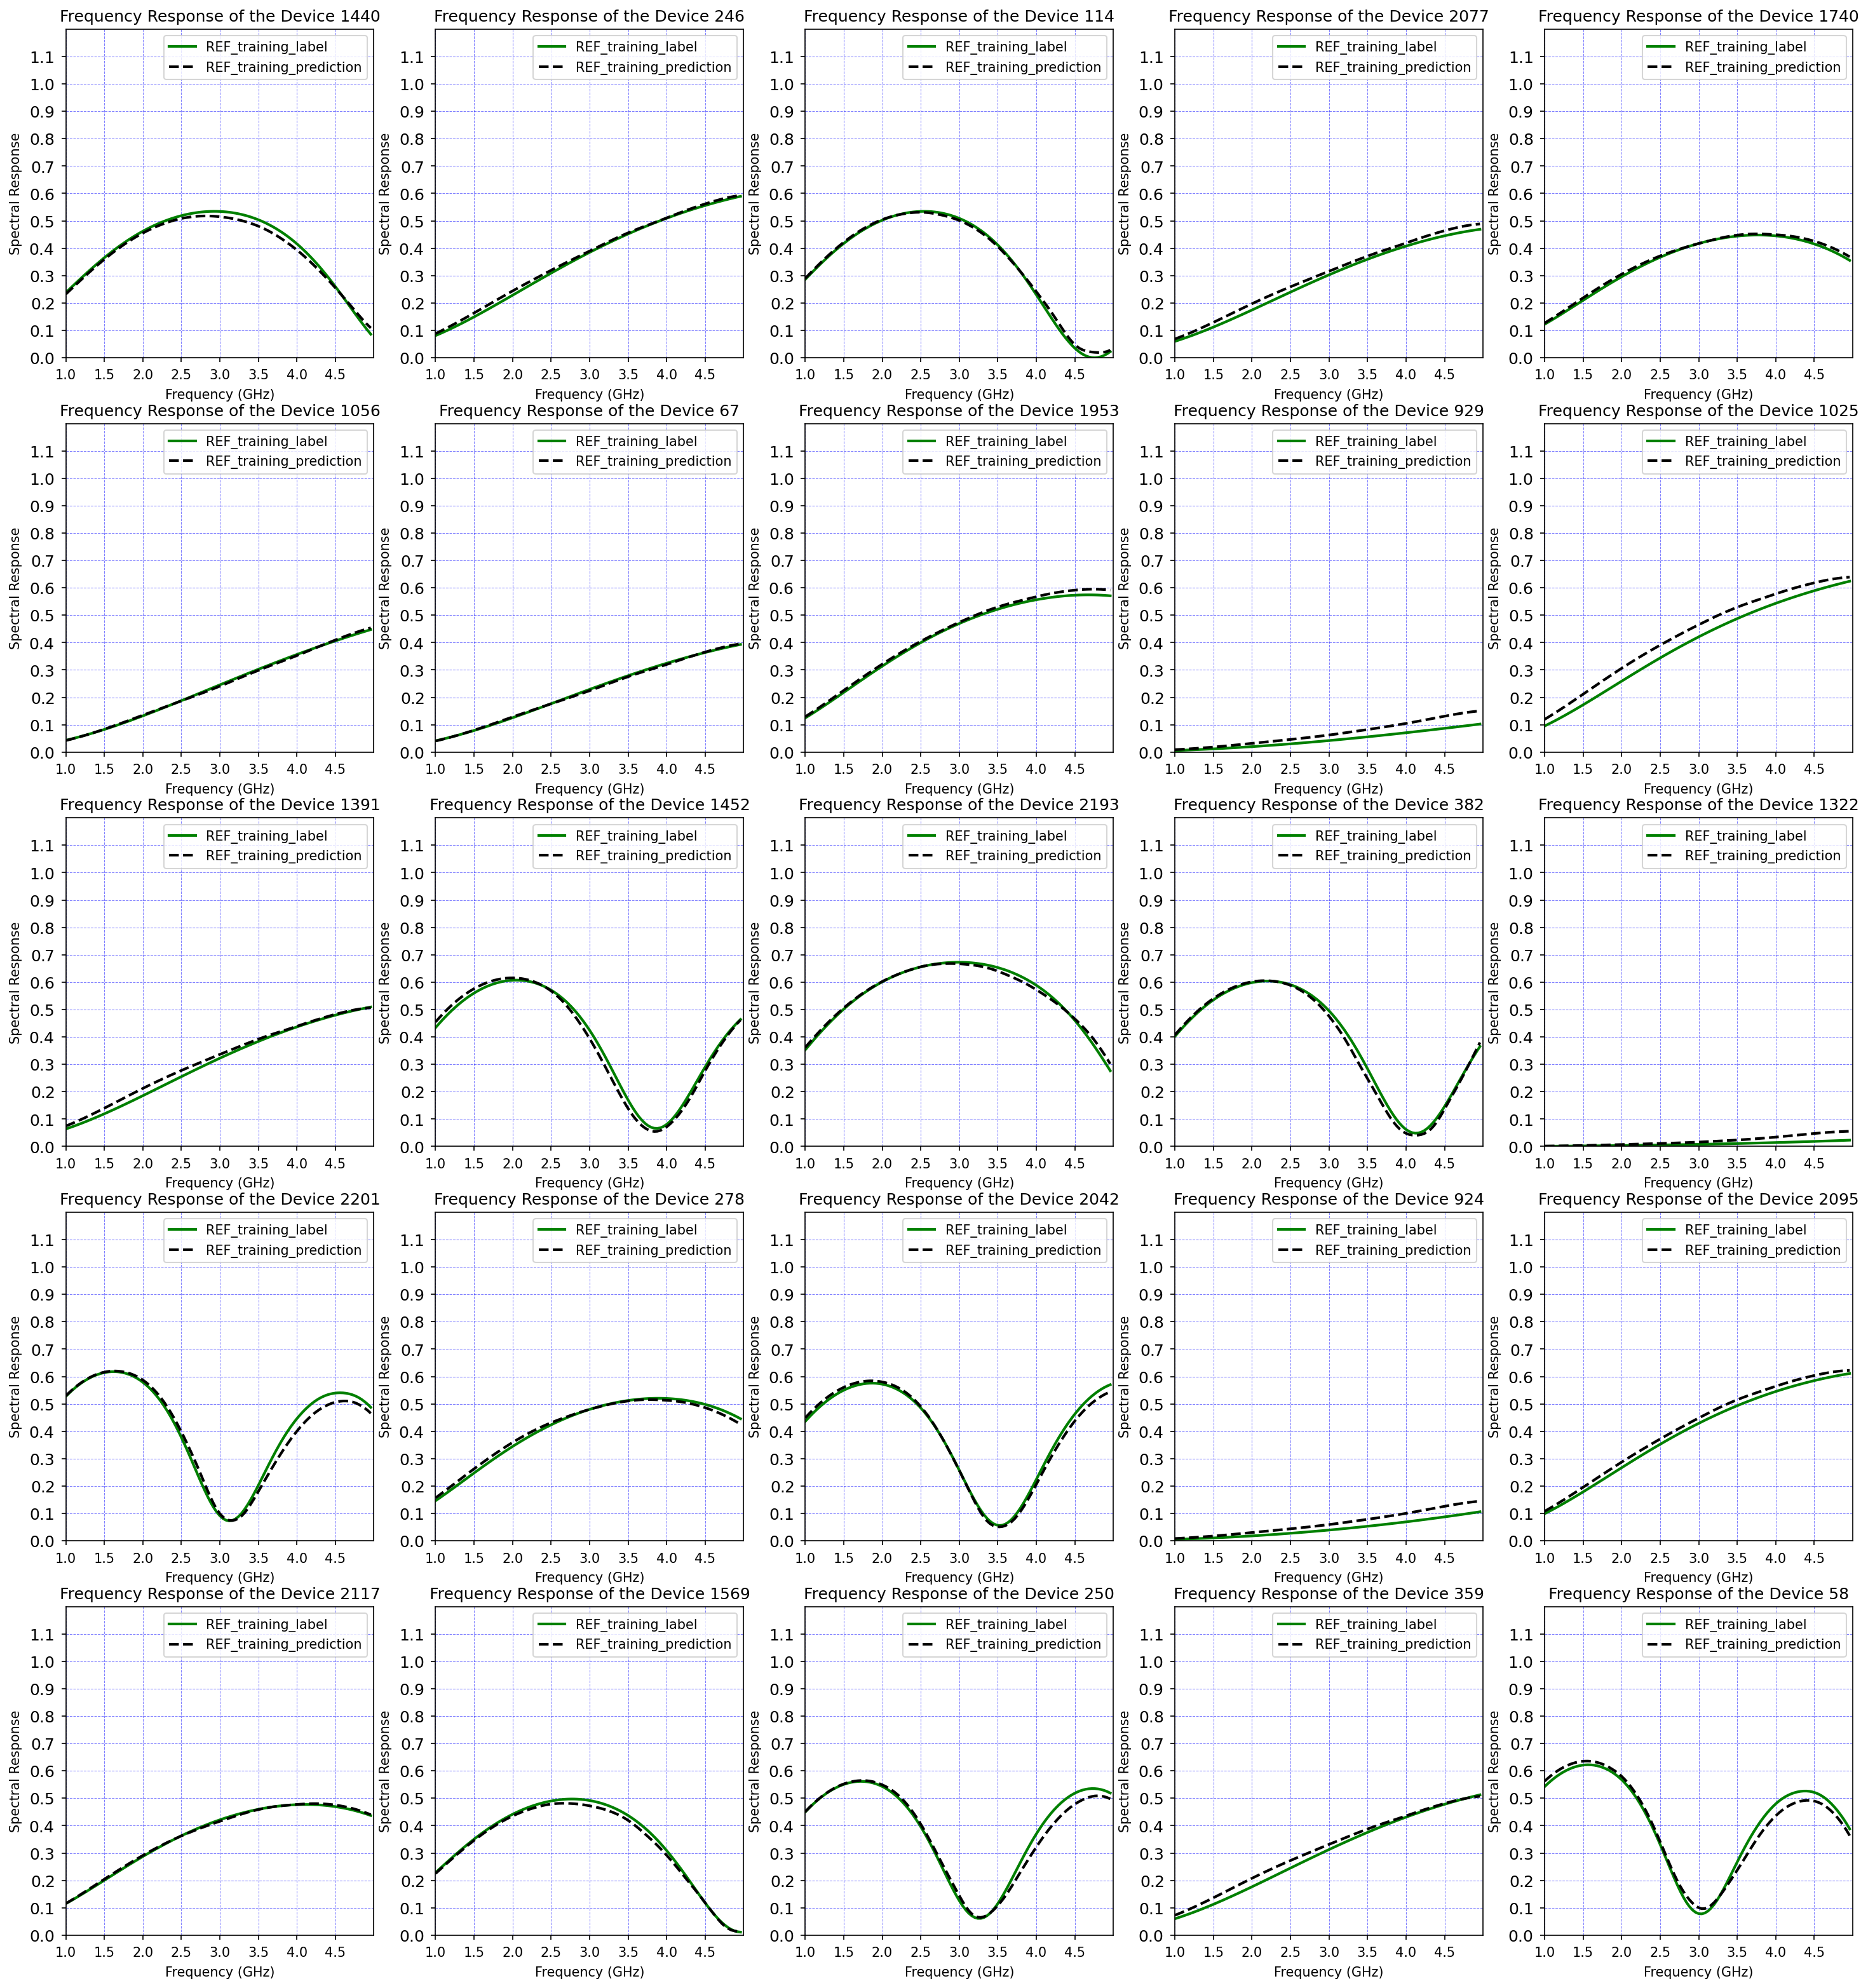

Number of seconds elapsed: 2.138821200001985 seconds
Number of minutes elapsed: 0.03564702000003308 minutes
Number of hours elapsed: 0.0005941170000005513 hours


In [92]:
################################################
## PLOTTING PREDICTIONS VS. TRAINING LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(trainPercentage)

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, REF_TRAIN[imageIndex,:], color ='green'  , lw=2,  ls='-', label = 'REF_training_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_train[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'REF_training_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    
    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)


plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [93]:
################################################
## VALIDATION PROCESS
################################################

In [94]:
################################################
## PREPARATION OF VALIDATION SET FOR EVALUATION
################################################

X_test = X_val
Y_test = Y_val


print ("number of test examples = " + str(X_test.shape[0]))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(Y_test)

number of test examples = 244
X_test shape: (244, 128, 128, 1)
Y_test shape: (244, 100)
[[5.18906006e-01 5.30617213e-01 5.41670669e-01 ... 5.32540663e-01
  5.28445773e-01 5.23121661e-01]
 [1.81904572e-01 1.90335387e-01 1.98767631e-01 ... 3.51726174e-02
  4.20072114e-02 4.98627087e-02]
 [1.21158108e-01 1.27941224e-01 1.34867155e-01 ... 6.40798081e-01
  6.42425368e-01 6.43988095e-01]
 ...
 [2.74426746e-02 2.91973679e-02 3.10166336e-02 ... 3.87713736e-01
  3.92203739e-01 3.96687663e-01]
 [1.79694946e-04 1.91489979e-04 2.03758654e-04 ... 3.76530280e-03
  3.83213699e-03 3.89970997e-03]
 [4.93465996e-02 5.24087108e-02 5.55720475e-02 ... 5.08305659e-01
  5.12408650e-01 5.16475518e-01]]


In [95]:
################################################
## EVALUATE VALIDATION DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_test, Y_test)
else: 
    Predictions_train = reconstructed_model.evaluate(X_test,Y_test)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

8/8 [==============================] - 0s 17ms/step - loss: 8.6929e-04 - accuracy: 0.4631
Number of seconds elapsed: 0.5228131000039866 seconds
Number of minutes elapsed: 0.00871355166673311 minutes
Number of hours elapsed: 0.0001452258611122185 hours


In [96]:
################################################
## PREDICT THE VALIDATION SETS
################################################

start = timer()

if training_mode:
    Predictions_test = Spectral_Model.predict(X_test)
else: 
    Predictions_test = reconstructed_model.predict(X_test)
print(Predictions_test[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.50604004 0.5181049  0.5295299  0.54028535 0.55036414 0.5597604
 0.5684721  0.57657105 0.5839679  0.5907414  0.5968782  0.6023455
 0.60717905 0.61140376 0.6150038  0.61796755 0.62031287 0.6220301
 0.62313336 0.62361324 0.6234233  0.6226085  0.6210827  0.6188437
 0.61589736 0.6122545  0.6078711  0.60270286 0.5966592  0.5896939
 0.58174473 0.57276875 0.56270343 0.5514973  0.5391177  0.52554214
 0.5108101  0.4949143  0.47786376 0.45961586 0.44030988 0.41997835
 0.3986336  0.376364   0.35316727 0.3292924  0.30498615 0.2804331
 0.25585586 0.2313847  0.2073315  0.18402447 0.16207263 0.14221206
 0.12509947 0.11110955 0.10020561 0.09206437 0.08626163 0.08255792
 0.0809394  0.08136328 0.08419577 0.08963483 0.09780812 0.10876446
 0.12230619 0.1379872  0.15522274 0.1735082  0.19242017 0.21168207
 0.23111756 0.25059596 0.27003396 0.28932557 0.3083735  0.32703662
 0.34516087 0.36263168 0.37937486 0.39531857 0.41045186 0.42475918
 0.43827638 0.4510531  0.46322826 0.47442755 0.4847372  0.4942149
 0

In [97]:
################################################
## COSINE SIMILARITY
################################################
Dat_A = Predictions_test
Dat_B = Y_test
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))


Average Cosine Similarity using Scipy: 
0.9958313483424882
Average Cosine Similarity using Numpy: 
0.9958313504029298


C:\Users\admin\AppData\Local\Temp\ipykernel_31236\878534574.py:52: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

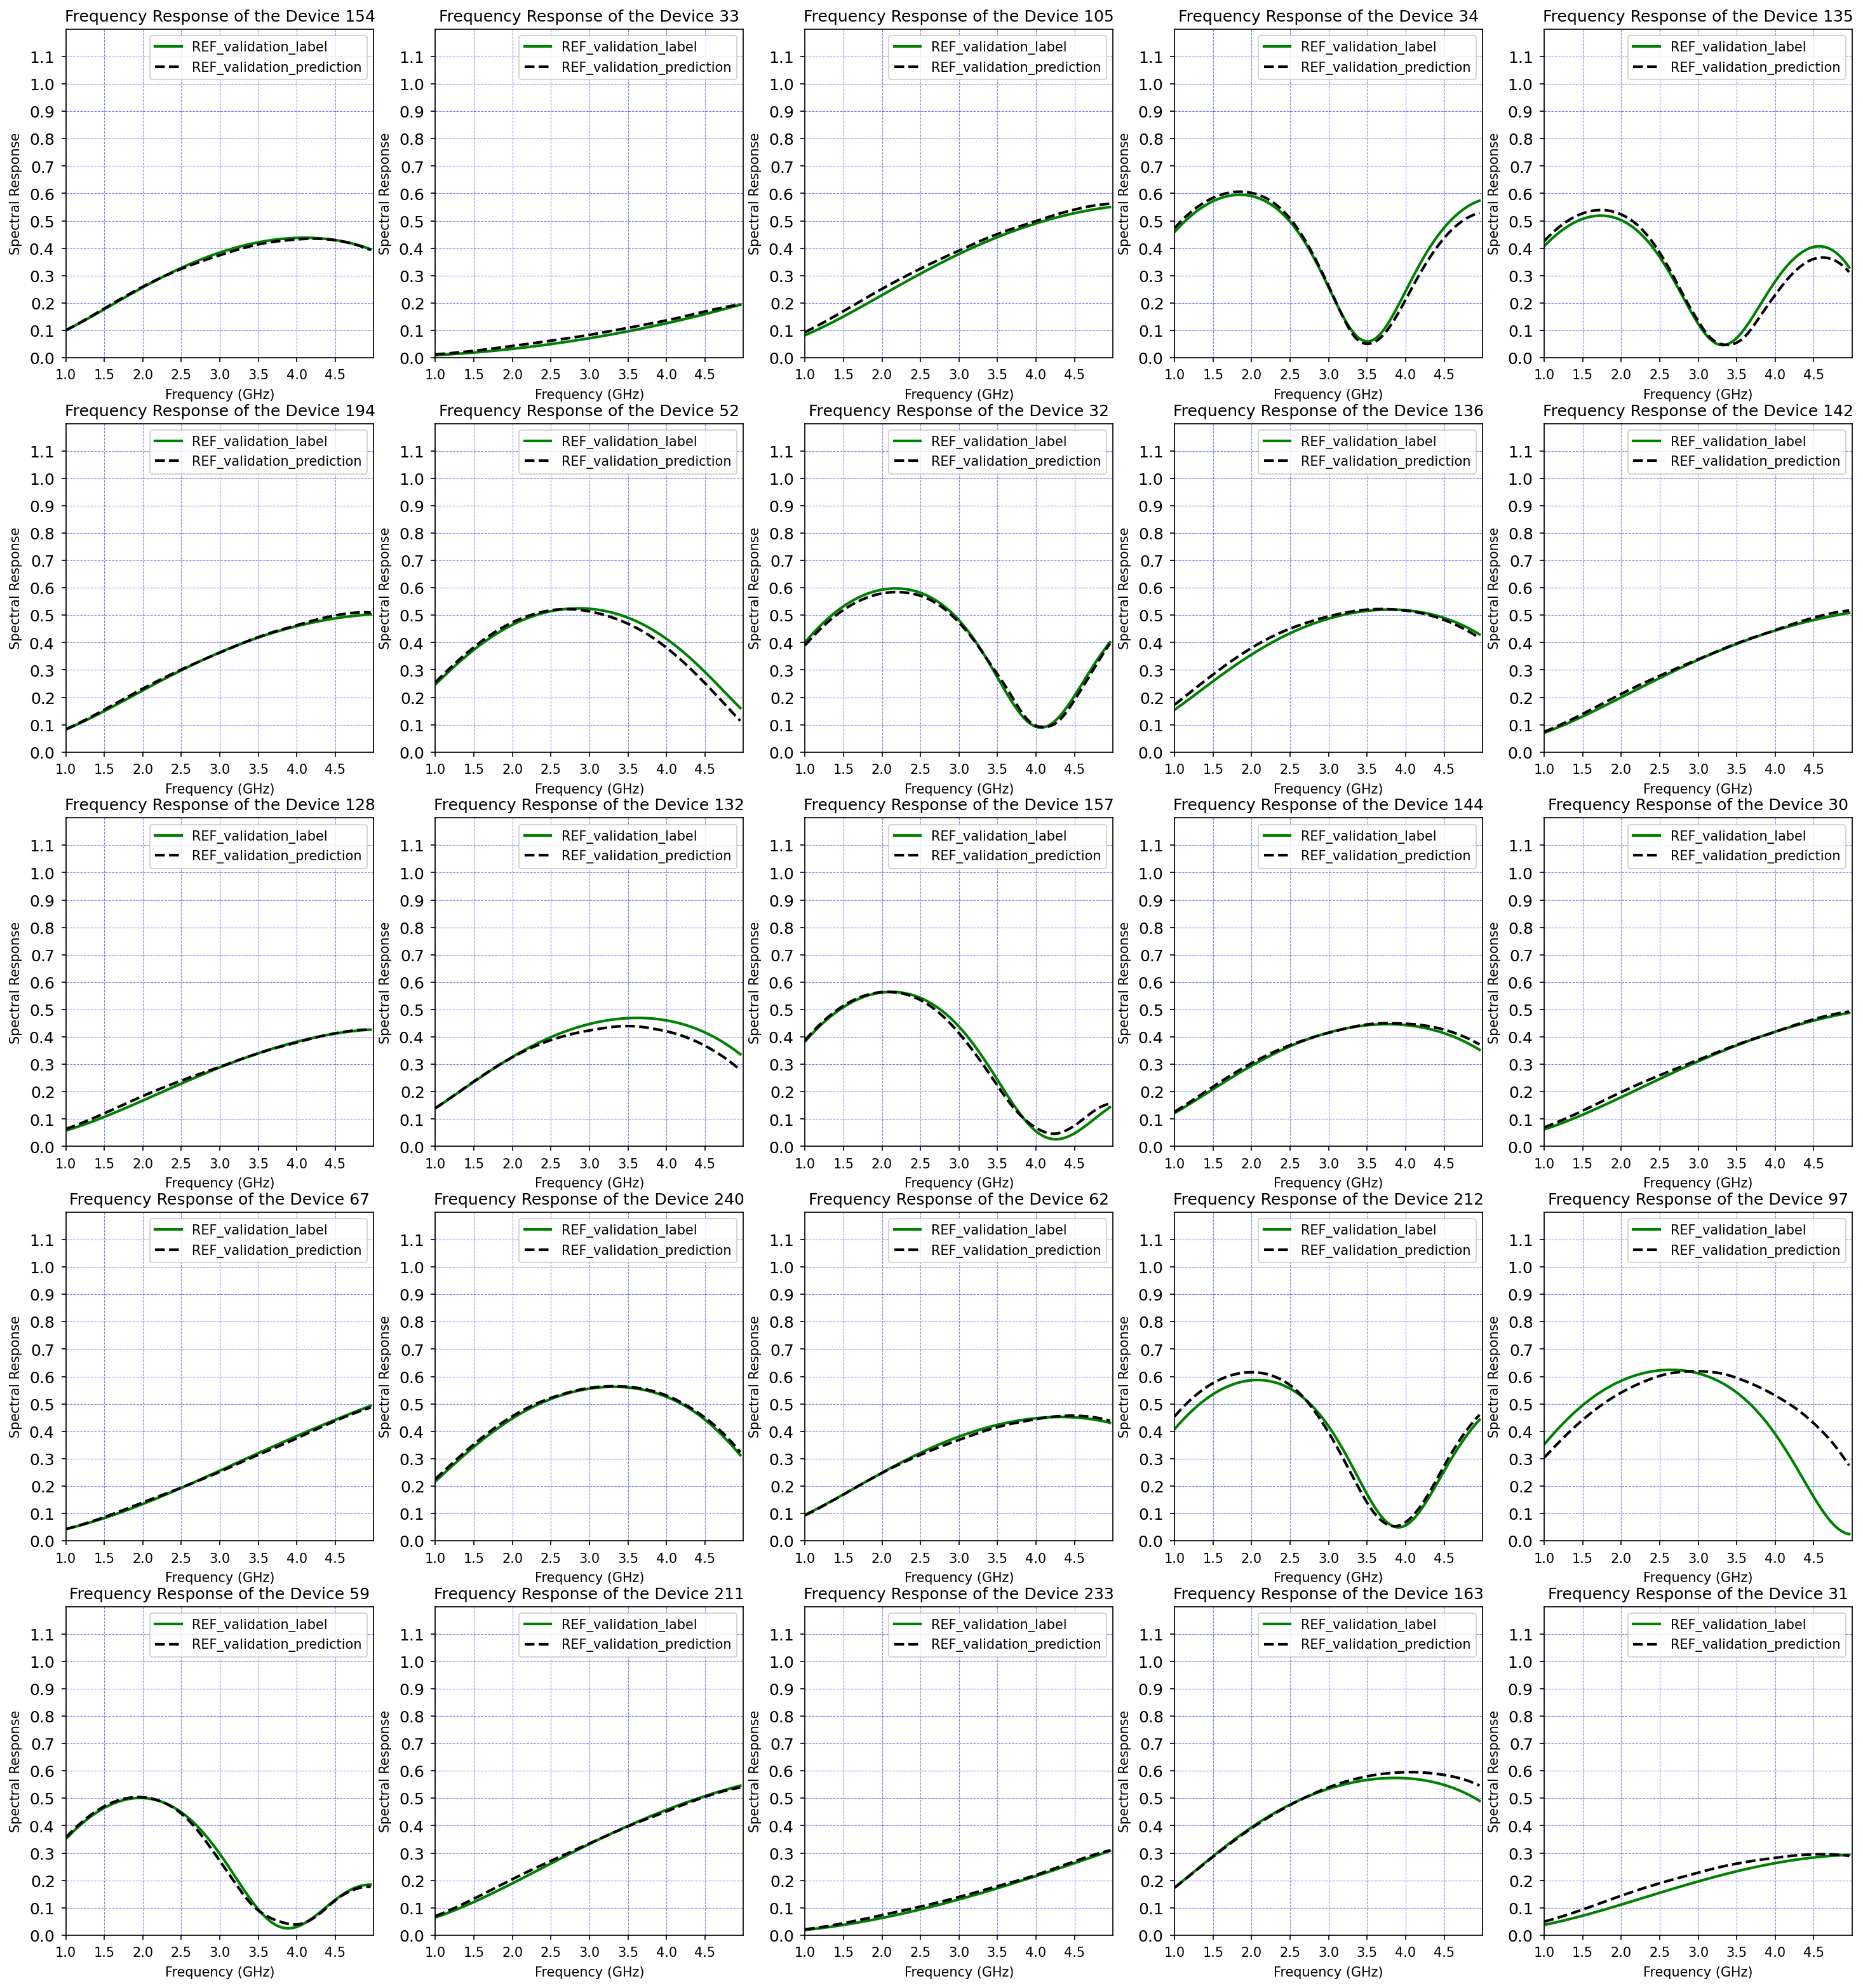

Number of seconds elapsed: 1.6635632000034093 seconds
Number of minutes elapsed: 0.027726053333390156 minutes
Number of hours elapsed: 0.00046210088888983593 hours


In [98]:
################################################
## PLOTTING PREDICTIONS VS. VALIDATION LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
   
    imageIndex = np.random.randint(testPercentage)
    
    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Y_test[imageIndex,:], color ='green'  , lw=2,  ls='-', label = 'REF_validation_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_test[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'REF_validation_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [218]:
################################################
## TESTING PROCESS
################################################

In [99]:
################################################
## LOAD ENTIRE TEST DATASET
################################################

# I did not change the val_ and _val naming to test_ or _test due to laziness.
# Just take note that everything in this code is now related to the test set.


start = timer()

# def load_spectrum_dataset():
# Load the Dataset

val_dataset  = h5py.File('test_set_100.h5', 'r')
#val_dataset  = h5py.File('Responses_1329.h5', 'r')

# Extract the keys
keys           = list(val_dataset.keys())

# Separate the Materials and Spectrum Response Data
material_val       = val_dataset[keys[0]]
spectrum_val       = val_dataset[keys[1]]

# Get individual keys for materials and spectrum
keys_mat_val       = list(material_val.keys())
keys_spec_val      = list(spectrum_val.keys())

print(keys_mat_val)
print(keys_spec_val)

# Separate the components of material group
DEV_ER_mat_val     = material_val[keys_mat_val[0]]
DEV_SIG_mat_val    = material_val[keys_mat_val[1]]

# Separate the components of the spectrum group
A_spec_val         = spectrum_val[keys_spec_val[0]]
C_spec_val         = spectrum_val[keys_spec_val[1]]
R_spec_val         = spectrum_val[keys_spec_val[2]]
T_spec_val         = spectrum_val[keys_spec_val[3]]


# Testing for the accessibility of the data in the spectrum group
#print(A_spec['1'][:].reshape(1,100).squeeze())
#print(C_spec['1'][:].reshape(1,100).squeeze())
#print(R_spec['1'][:].reshape(1,100).squeeze())
#print(T_spec['1'][:].reshape(1,100).squeeze())
DEV_ER_mat_x_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[0]
DEV_ER_mat_y_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[1]

# Retriving a list for the total number of samples (HDF5 groups cannot be indexed easily)
sub_keys_spectrum_val = list(A_spec_val.keys())
spec_index_val        = [int(x) for x in sub_keys_spectrum_val]
#print(sorted(spec_index_val))
#print(len(spec_index_val))

# Prepare for the numpy data containers
DEV_ER_val    = np.zeros([len(spec_index_val), 128, 128, 1])
DEV_SIG_val   = np.zeros([len(spec_index_val), 128, 128, 1])
REF_val       = np.zeros([len(spec_index_val), 100])
TRN_val       = np.zeros([len(spec_index_val), 100])
ABS_val       = np.zeros([len(spec_index_val), 100])
CON_val       = np.zeros([len(spec_index_val), 100])

# Create a for loop to fill the numpy data containers from the HDF5 file containers

for i in range(len(spec_index_val)):
    DEV_ER_val[i, :, :,:]       = DEV_ER_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    DEV_SIG_val[i, :, :,:]      = DEV_SIG_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    REF_val[i, :]               = R_spec_val[str(i)][:].reshape(1,R_spec_val['1'][:].shape[0]).squeeze()
    TRN_val[i, :]               = T_spec_val[str(i)][:].reshape(1,T_spec_val['1'][:].shape[0]).squeeze()
    ABS_val[i, :]               = A_spec_val[str(i)][:].reshape(1,A_spec_val['1'][:].shape[0]).squeeze()
    CON_val[i, :]               = C_spec_val[str(i)][:].reshape(1,C_spec_val['1'][:].shape[0]).squeeze()
    
#return DEV_ER, DEV_SIG, REF, TRN, ABS, CON

print(REF_val[:].shape)
print(DEV_ER_val[:].shape)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['DevER', 'DevSIG']
['A', 'C', 'R', 'T']
(100, 100)
(100, 128, 128, 1)
Number of seconds elapsed: 0.24796060000517173 seconds
Number of minutes elapsed: 0.004132676666752862 minutes
Number of hours elapsed: 6.887794444588104e-05 hours


C:\Users\admin\AppData\Local\Temp\ipykernel_31236\2339469443.py:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

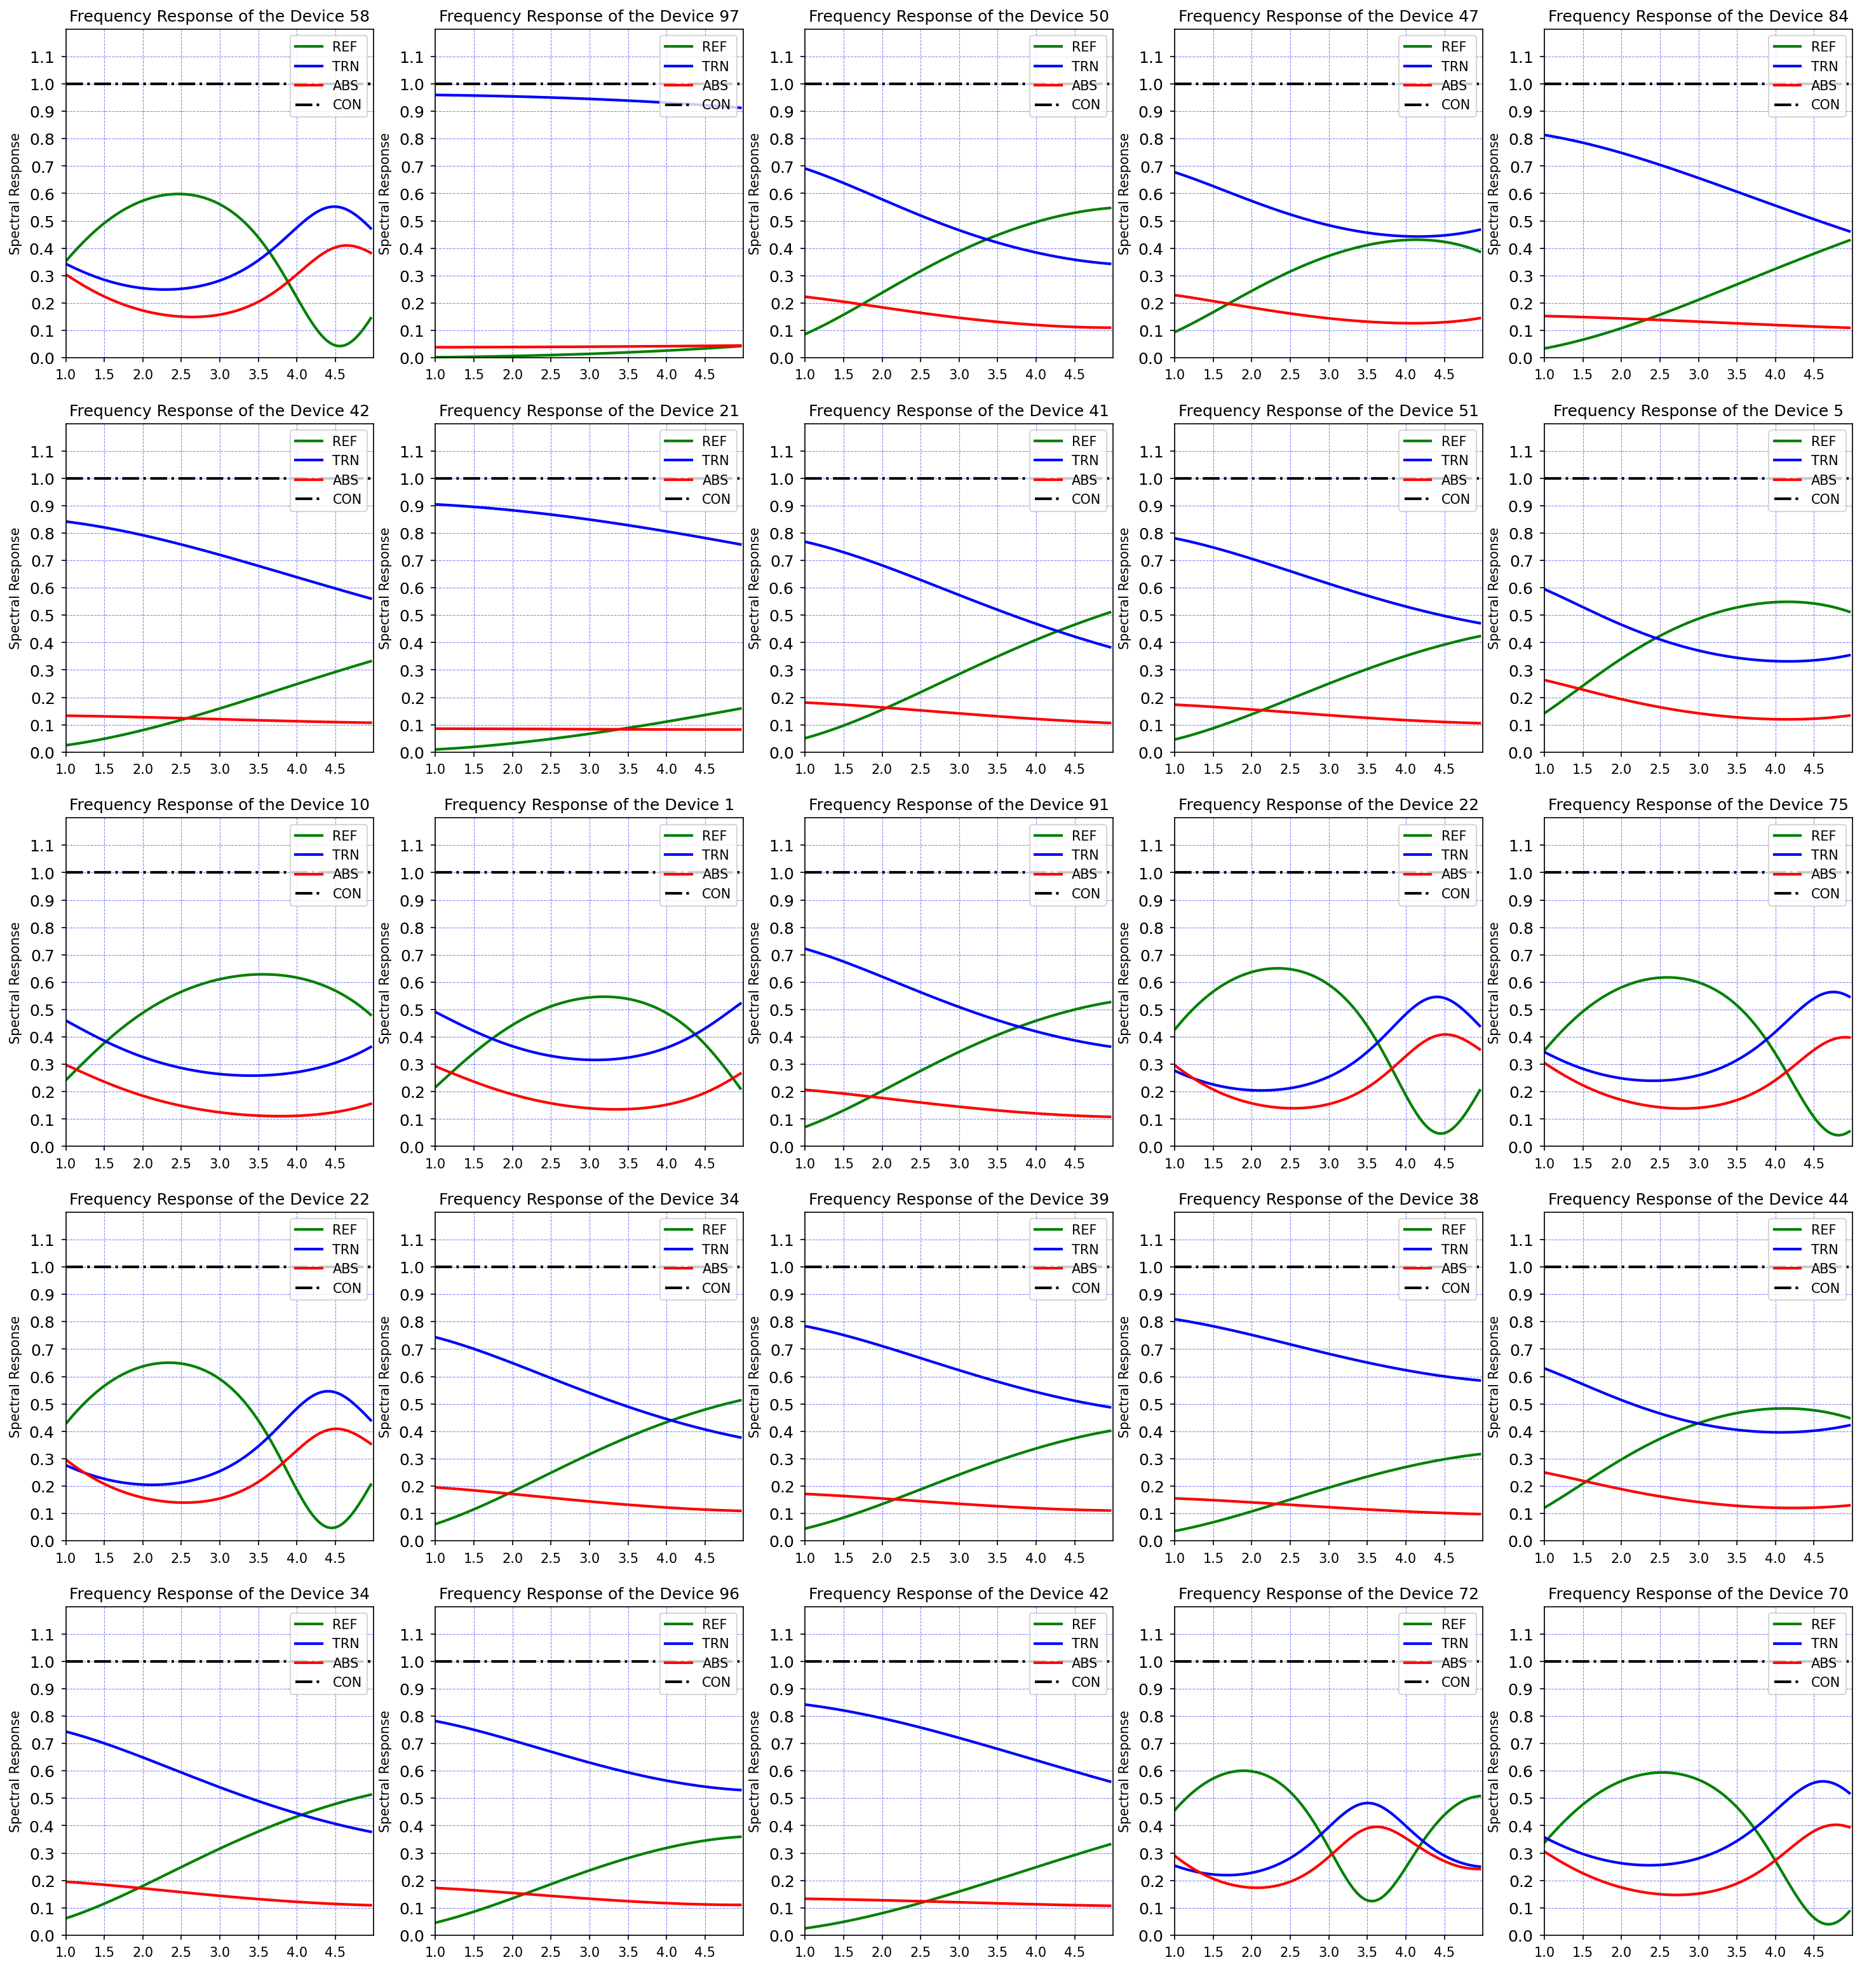

Number of seconds elapsed: 1.5200842000049306 seconds
Number of minutes elapsed: 0.025334736666748844 minutes
Number of hours elapsed: 0.00042224561111248074 hours


In [100]:
################################################
## PLOTTING FOR TEST DATA SET
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, REF_val[imageIndex,:], color ='green'   , lw=2,  ls='-', label = 'REF')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, TRN_val[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, ABS_val[imageIndex,:], color ='red' , lw=2,  ls='-', label = 'ABS')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, CON_val[imageIndex,:], color ='black' , lw=2,  ls='-.', label = 'CON')

    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)
    axes[x_plot, y_plot].xaxis.label.set_color('white')

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)


plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

<Figure size 432x288 with 0 Axes>

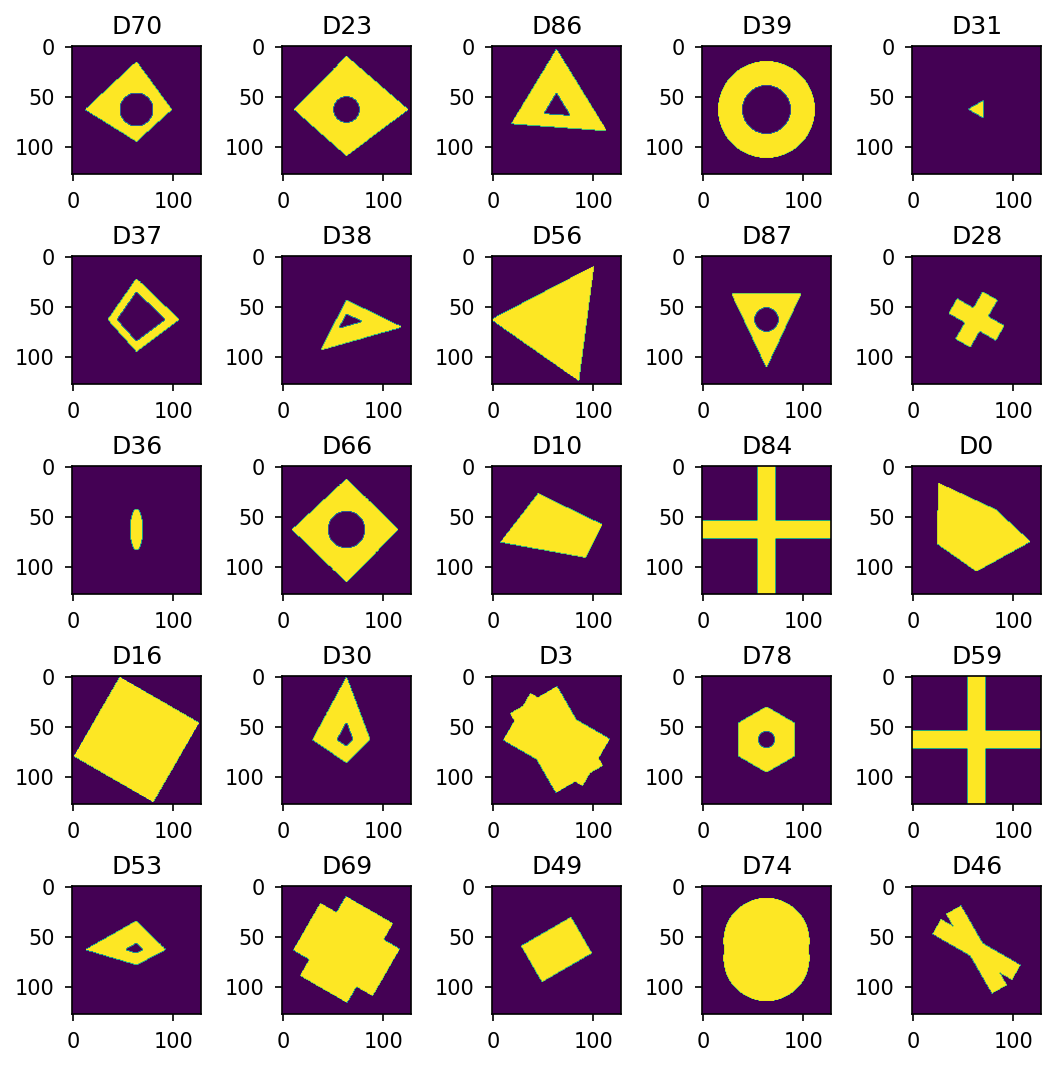

Number of seconds elapsed: 1.0260913000020082 seconds
Number of minutes elapsed: 0.017101521666700138 minutes
Number of hours elapsed: 0.00028502536111166894 hours


In [101]:
################################################
## DISPLAY IMAGE FOR TEST/VALIDATION DATA SET
################################################

start = timer()

plot_row = 5
plot_column = 5
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row, ncols = plot_column, figsize = (7,7), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):
    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))
    axes[x_plot,y_plot].imshow(DEV_ER_val[imageIndex].reshape((DEV_ER_val.shape[1],DEV_ER.shape[1])).T) #display sample training image
    axes[x_plot,y_plot].set_title('D'+ str(imageIndex))
plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [102]:
################################################
## PREPARATION OF THE TEST FOR TRAINING
################################################

X_test = DEV_ER_val
Y_test = REF_val

print ("number of test examples = " + str(X_test.shape[0]))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(Y_test)

number of test examples = 100
X_test shape: (100, 128, 128, 1)
Y_test shape: (100, 100)
[[2.16718883e-01 2.26940789e-01 2.37195987e-01 ... 2.42202605e-01
  2.27055596e-01 2.11881306e-01]
 [1.60256776e-01 1.68689854e-01 1.77243987e-01 ... 6.01831852e-01
  6.00024086e-01 5.98054122e-01]
 [2.20384417e-04 2.34740384e-04 2.49658612e-04 ... 4.03647411e-03
  4.09839079e-03 4.16069005e-03]
 ...
 [4.56620929e-02 4.84437106e-02 5.13108171e-02 ... 3.57715318e-01
  3.58545815e-01 3.59283026e-01]
 [1.25516136e-03 1.33777723e-03 1.42374163e-03 ... 2.77339414e-02
  2.82538440e-02 2.87804933e-02]
 [1.58870955e-02 1.69184547e-02 1.79897712e-02 ... 2.77056599e-01
  2.81097893e-01 2.85158318e-01]]


In [103]:
################################################
## EVALUATE TEST DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_test, Y_test)
else: 
    Predictions_train = reconstructed_model.evaluate(X_test,Y_test)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

4/4 [==============================] - 0s 47ms/step - loss: 5.4215e-04 - accuracy: 0.5100
Number of seconds elapsed: 0.3949053999967873 seconds
Number of minutes elapsed: 0.006581756666613122 minutes
Number of hours elapsed: 0.00010969594444355202 hours


In [104]:
################################################
## PREDICT THE TEST/VALIDATION SETS
################################################

start = timer()

if training_mode:
    Predictions_test = Spectral_Model.predict(X_test)
else: 
    Predictions_test = reconstructed_model.predict(X_test)
print(Predictions_test[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.21496567 0.22509813 0.23526274 0.24543124 0.25558642 0.2657021
 0.27576482 0.2857551  0.29565087 0.30544484 0.31511757 0.3246607
 0.334057   0.343298   0.35237676 0.3612785  0.3699928  0.37851682
 0.38683942 0.39495474 0.40284672 0.4105208  0.41796118 0.42516765
 0.43213117 0.43884987 0.44532612 0.451551   0.45751455 0.46321538
 0.46866193 0.4738477  0.47877178 0.48343462 0.48783597 0.49197635
 0.4958629  0.4995034  0.5028953  0.506022   0.5089523  0.5117123
 0.514284   0.51665217 0.51883847 0.5208449  0.5226351  0.5241836
 0.52549106 0.5265624  0.5274442  0.5281545  0.5286943  0.52906704
 0.5292731  0.52930033 0.5291398  0.5287795  0.52818686 0.5273531
 0.52626306 0.52492154 0.5233221  0.5214465  0.5192759  0.51681125
 0.5140482  0.5110015  0.5076869  0.5041023  0.5002234  0.49605608
 0.4916091  0.48686767 0.48180678 0.4764193  0.4706963  0.46462214
 0.45816165 0.45129922 0.4440314  0.4364126  0.42846128 0.42019856
 0.41164672 0.4028201  0.39371544 0.38430893 0.37453094 0.36438426


In [105]:
################################################
## COSINE SIMILARITY
################################################
Dat_A = Predictions_test
Dat_B = Y_test
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))

Average Cosine Similarity using Scipy: 
0.9978360779196032
Average Cosine Similarity using Numpy: 
0.9978360800994436


C:\Users\admin\AppData\Local\Temp\ipykernel_31236\1853785519.py:52: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

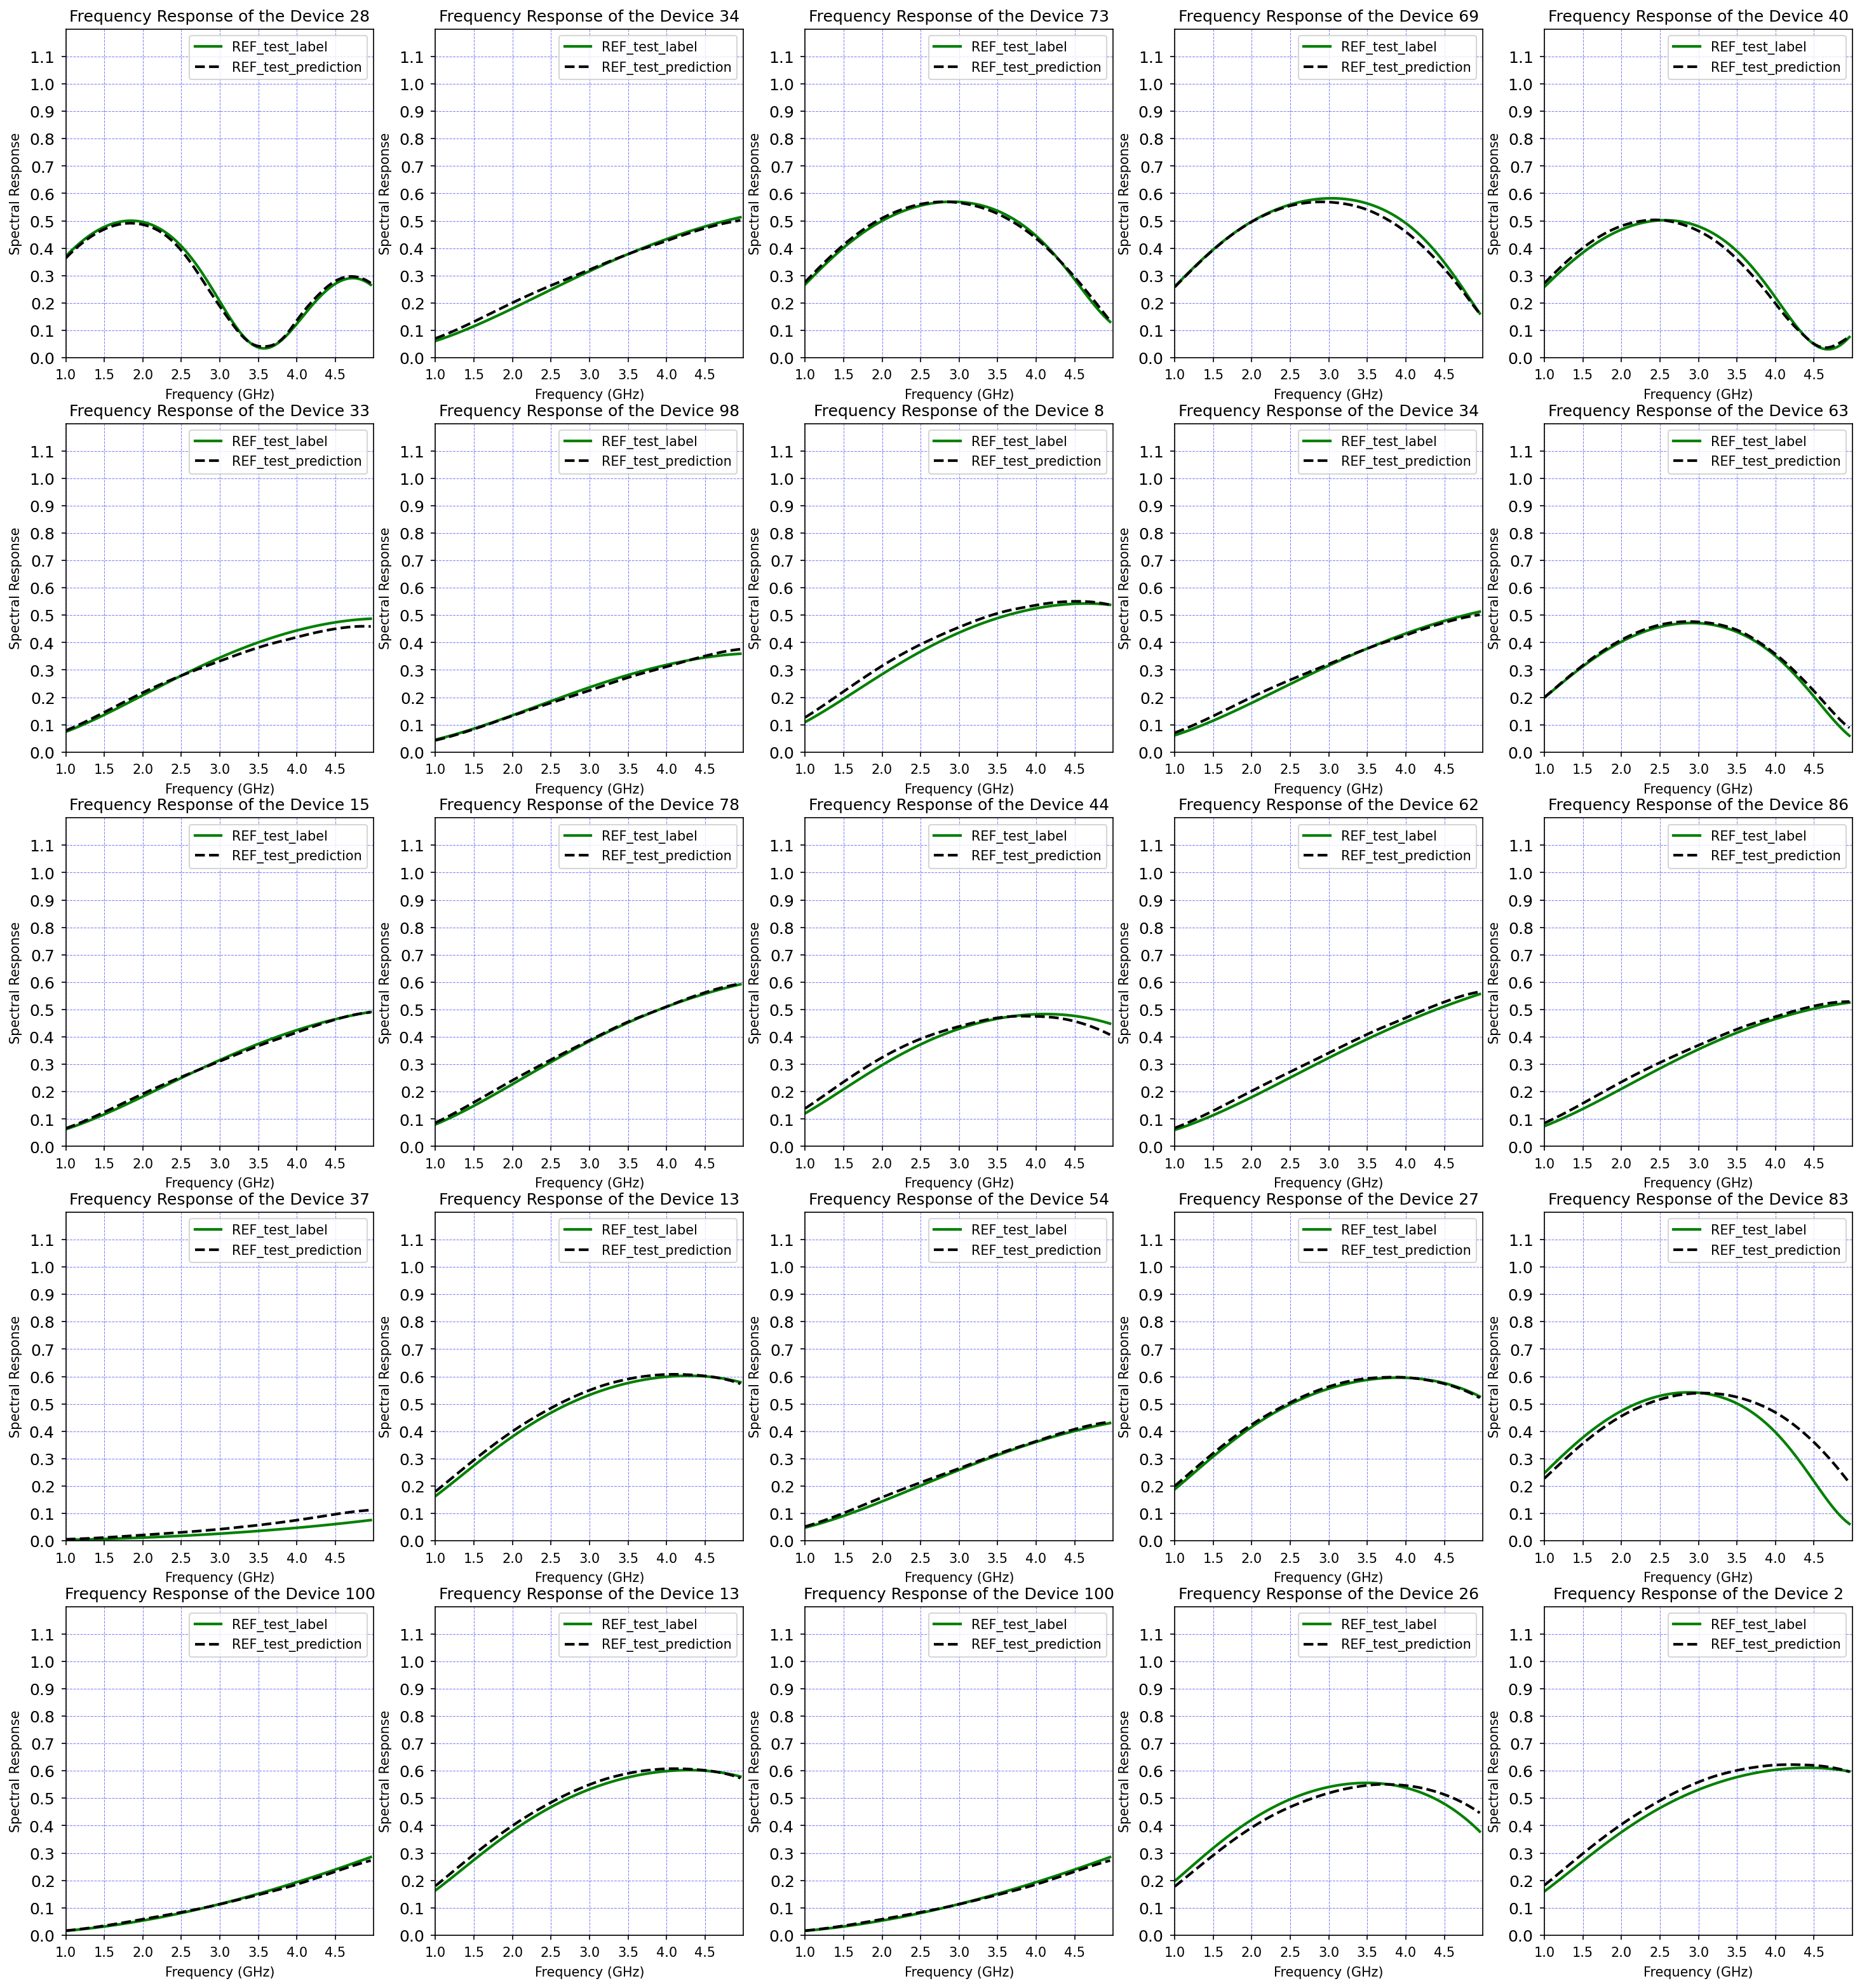

Number of seconds elapsed: 1.4128828999964753 seconds
Number of minutes elapsed: 0.023548048333274587 minutes
Number of hours elapsed: 0.00039246747222124314 hours


In [106]:
################################################
## PLOTTING PREDICTIONS VS. TEST LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
   
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Y_test[imageIndex,:], color ='green'  , lw=2,  ls='-', label = 'REF_test_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_test[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'REF_test_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [107]:
################################################
## BULK TESTING PROCESS
################################################

In [108]:
################################################
## LOAD ENTIRE TEST DATASET
################################################

# I did not change the val_ and _val naming to test_ or _test due to laziness.
# Just take note that everything in this code is now related to the test set.


start = timer()

# def load_spectrum_dataset():
# Load the Dataset

#val_dataset  = h5py.File('test_set_100.h5', 'r')
val_dataset  = h5py.File('Responses_1329.h5', 'r')

# Extract the keys
keys           = list(val_dataset.keys())

# Separate the Materials and Spectrum Response Data
material_val       = val_dataset[keys[0]]
spectrum_val       = val_dataset[keys[1]]

# Get individual keys for materials and spectrum
keys_mat_val       = list(material_val.keys())
keys_spec_val      = list(spectrum_val.keys())

print(keys_mat_val)
print(keys_spec_val)

# Separate the components of material group
DEV_ER_mat_val     = material_val[keys_mat_val[0]]
DEV_SIG_mat_val    = material_val[keys_mat_val[1]]

# Separate the components of the spectrum group
A_spec_val         = spectrum_val[keys_spec_val[0]]
C_spec_val         = spectrum_val[keys_spec_val[1]]
R_spec_val         = spectrum_val[keys_spec_val[2]]
T_spec_val         = spectrum_val[keys_spec_val[3]]


# Testing for the accessibility of the data in the spectrum group
#print(A_spec['1'][:].reshape(1,100).squeeze())
#print(C_spec['1'][:].reshape(1,100).squeeze())
#print(R_spec['1'][:].reshape(1,100).squeeze())
#print(T_spec['1'][:].reshape(1,100).squeeze())
DEV_ER_mat_x_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[0]
DEV_ER_mat_y_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[1]

# Retriving a list for the total number of samples (HDF5 groups cannot be indexed easily)
sub_keys_spectrum_val = list(A_spec_val.keys())
spec_index_val        = [int(x) for x in sub_keys_spectrum_val]
#print(sorted(spec_index_val))
#print(len(spec_index_val))

# Prepare for the numpy data containers
DEV_ER_val    = np.zeros([len(spec_index_val), 128, 128, 1])
DEV_SIG_val   = np.zeros([len(spec_index_val), 128, 128, 1])
REF_val       = np.zeros([len(spec_index_val), 100])
TRN_val       = np.zeros([len(spec_index_val), 100])
ABS_val       = np.zeros([len(spec_index_val), 100])
CON_val       = np.zeros([len(spec_index_val), 100])

# Create a for loop to fill the numpy data containers from the HDF5 file containers

for i in range(len(spec_index_val)):
    DEV_ER_val[i, :, :,:]       = DEV_ER_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    DEV_SIG_val[i, :, :,:]      = DEV_SIG_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    REF_val[i, :]               = R_spec_val[str(i)][:].reshape(1,R_spec_val['1'][:].shape[0]).squeeze()
    TRN_val[i, :]               = T_spec_val[str(i)][:].reshape(1,T_spec_val['1'][:].shape[0]).squeeze()
    ABS_val[i, :]               = A_spec_val[str(i)][:].reshape(1,A_spec_val['1'][:].shape[0]).squeeze()
    CON_val[i, :]               = C_spec_val[str(i)][:].reshape(1,C_spec_val['1'][:].shape[0]).squeeze()
    
#return DEV_ER, DEV_SIG, REF, TRN, ABS, CON

print(REF_val[:].shape)
print(DEV_ER_val[:].shape)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['DevER', 'DevSIG']
['A', 'C', 'R', 'T']
(1329, 100)
(1329, 128, 128, 1)
Number of seconds elapsed: 2.7311216999951284 seconds
Number of minutes elapsed: 0.045518694999918806 minutes
Number of hours elapsed: 0.0007586449166653135 hours


C:\Users\admin\AppData\Local\Temp\ipykernel_31236\3218662671.py:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

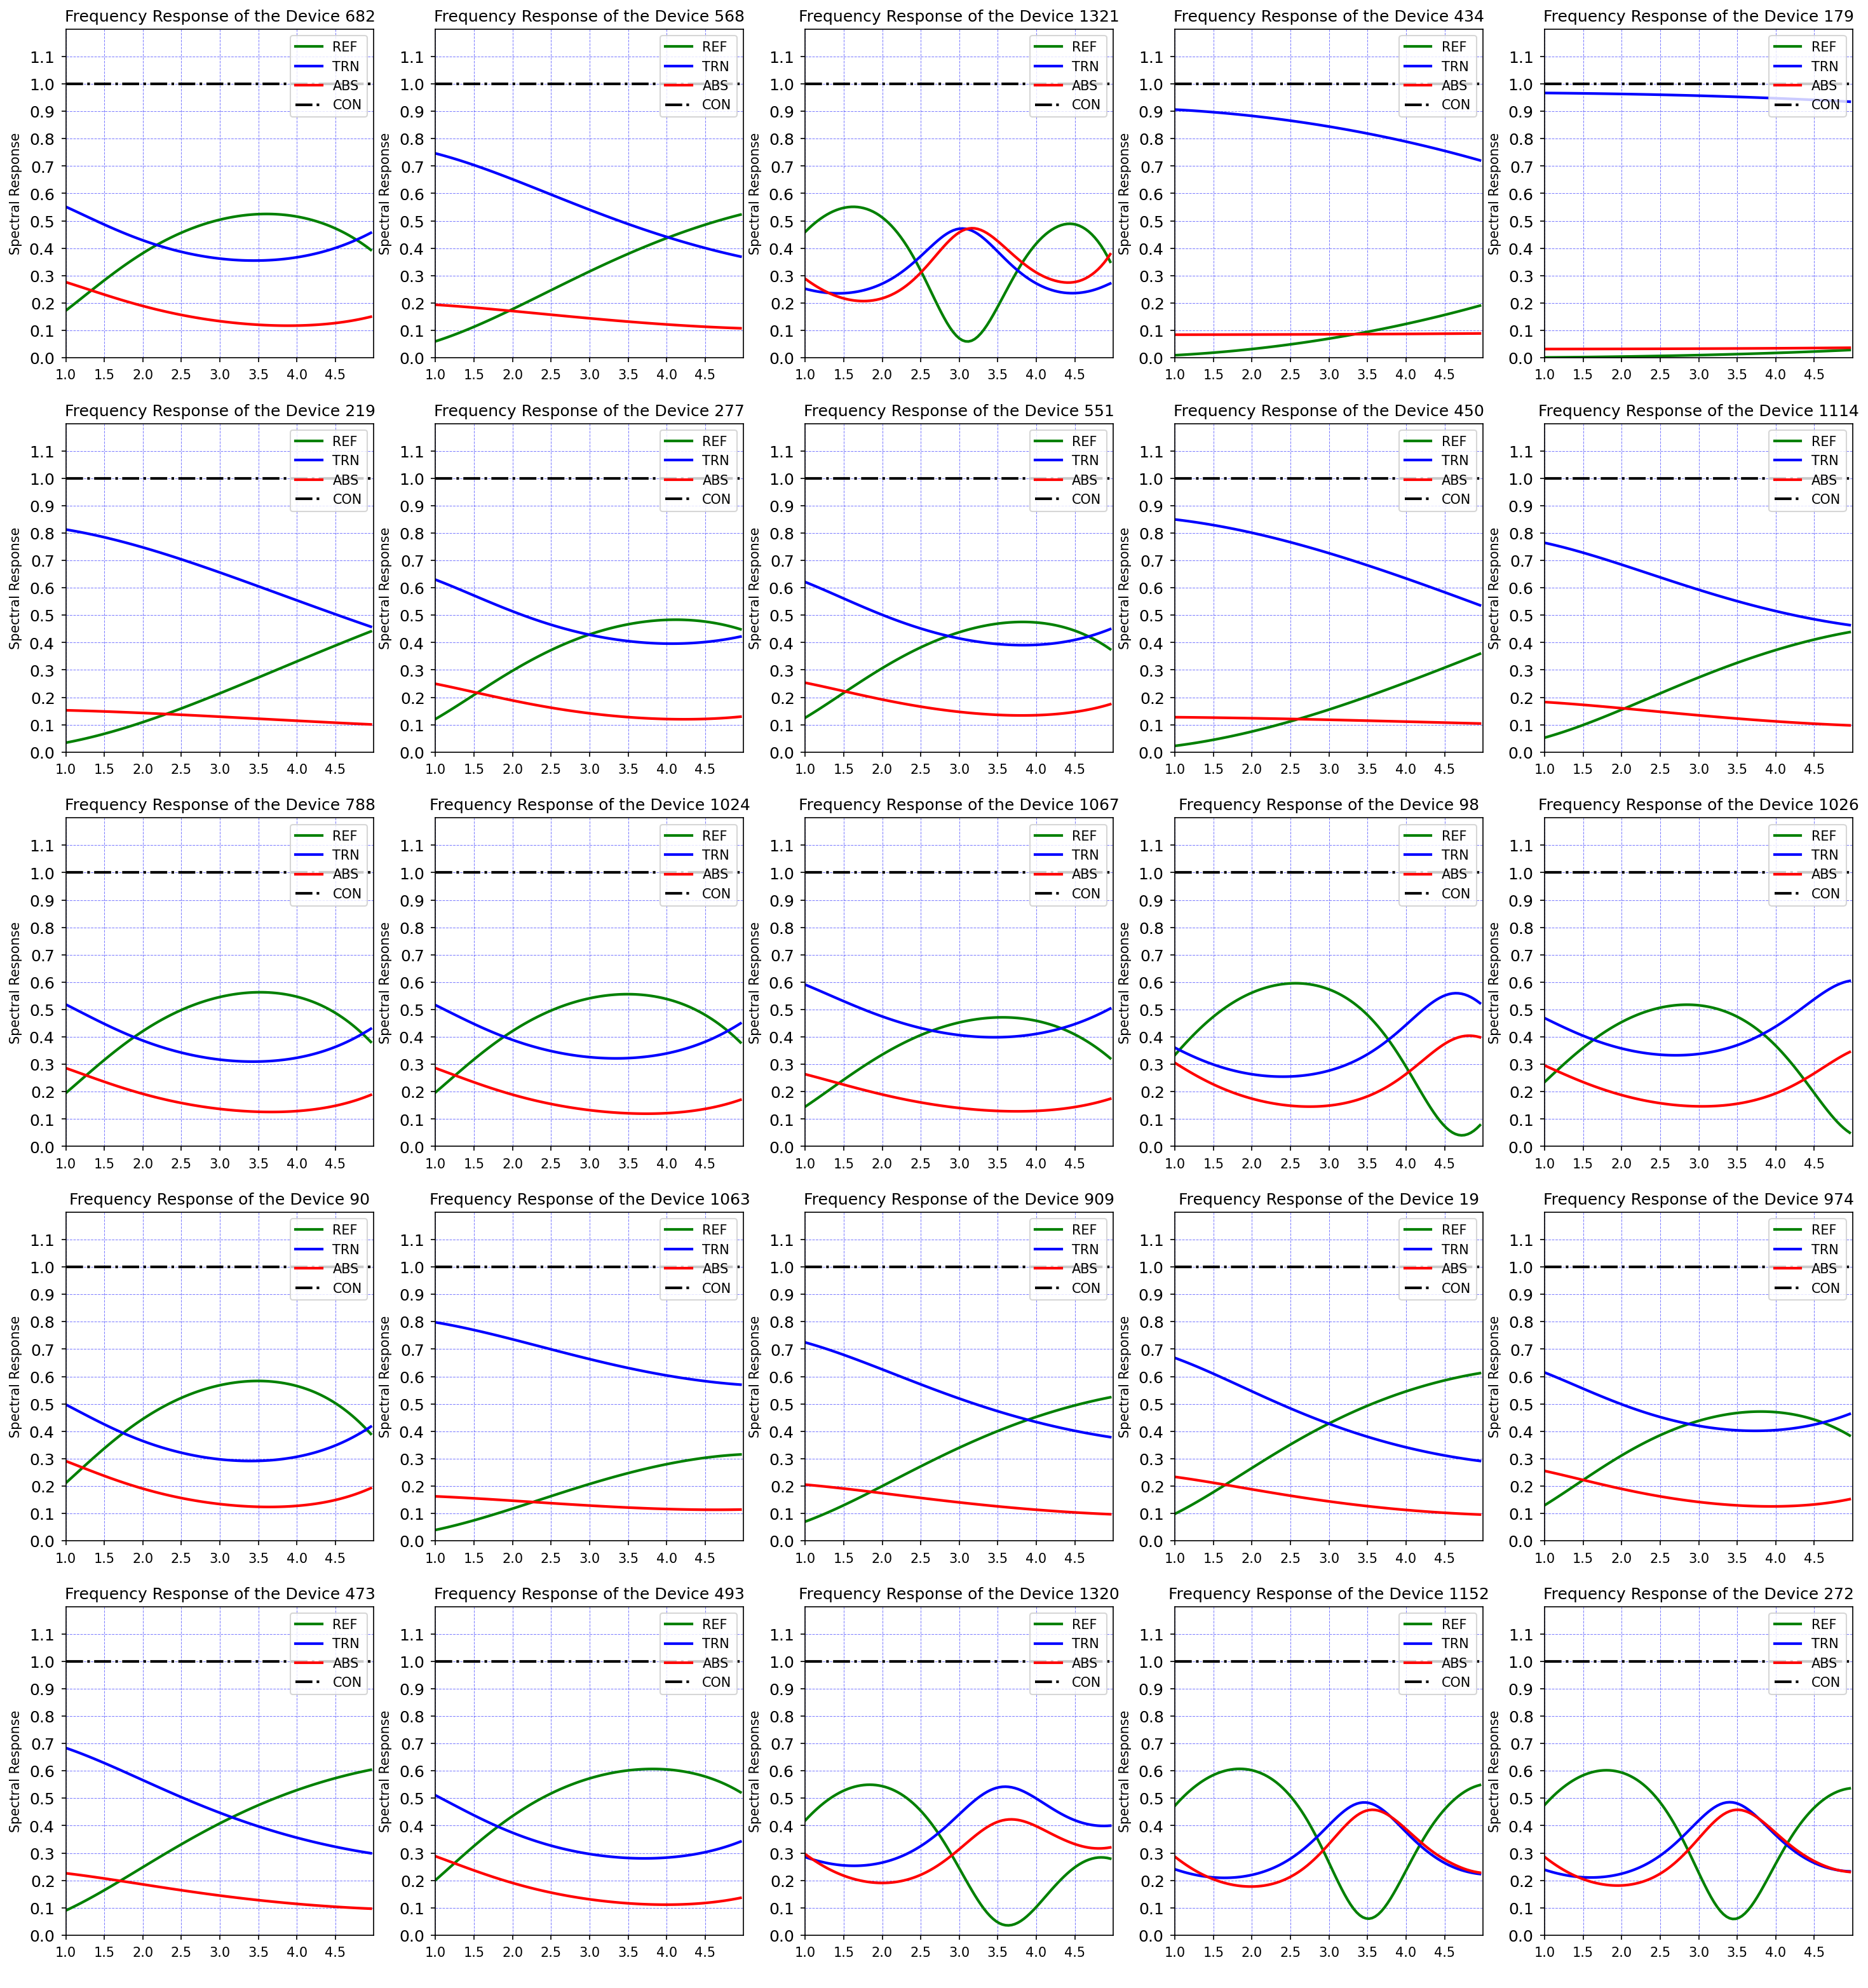

Number of seconds elapsed: 1.7460461000009673 seconds
Number of minutes elapsed: 0.029100768333349455 minutes
Number of hours elapsed: 0.00048501280555582425 hours


In [109]:
################################################
## PLOTTING FOR BULK TEST DATA SET
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, REF_val[imageIndex,:], color ='green'   , lw=2,  ls='-', label = 'REF')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, TRN_val[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, ABS_val[imageIndex,:], color ='red' , lw=2,  ls='-', label = 'ABS')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, CON_val[imageIndex,:], color ='black' , lw=2,  ls='-.', label = 'CON')

    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)
    axes[x_plot, y_plot].xaxis.label.set_color('white')

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)


plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

<Figure size 432x288 with 0 Axes>

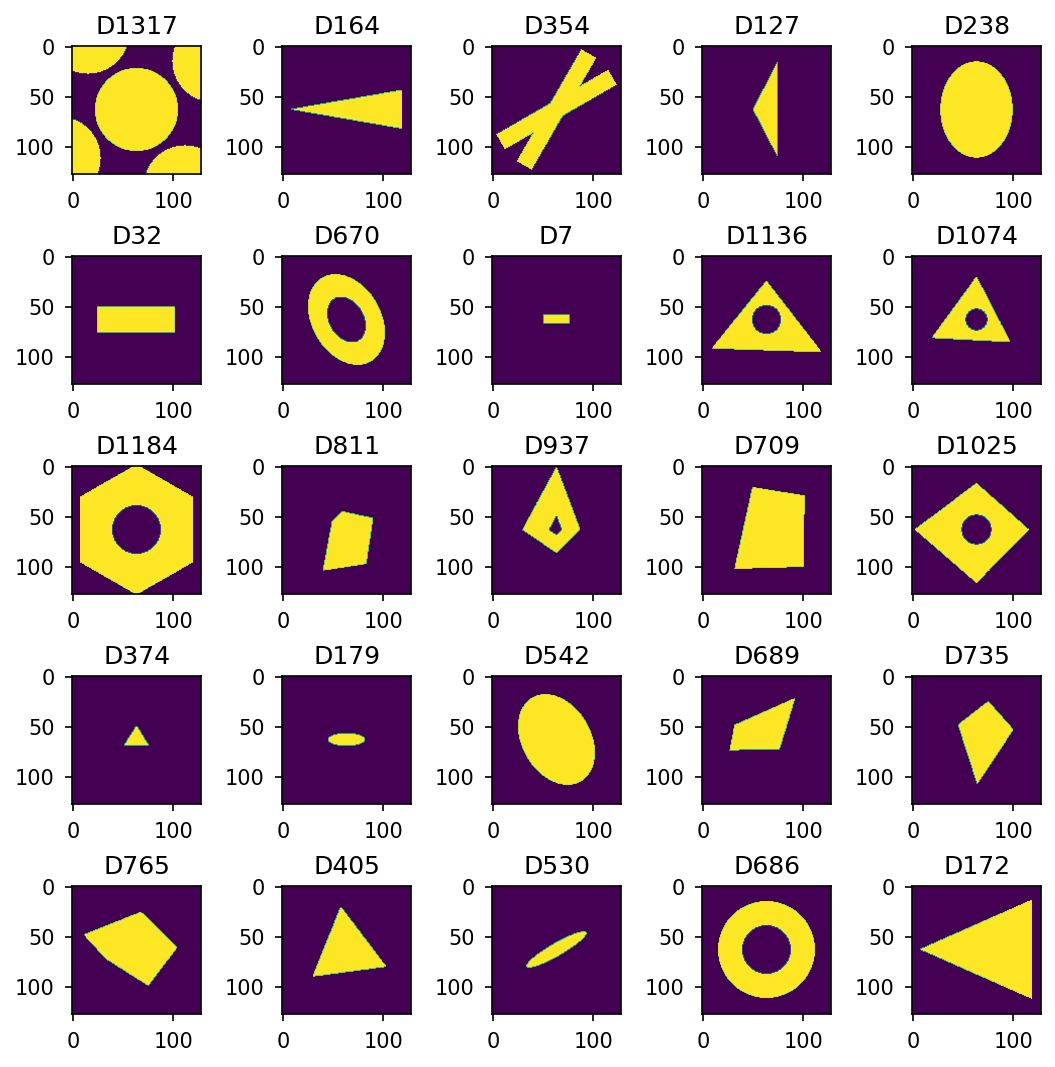

Number of seconds elapsed: 0.8435267999957432 seconds
Number of minutes elapsed: 0.014058779999929053 minutes
Number of hours elapsed: 0.00023431299999881756 hours


In [110]:
################################################
## DISPLAY IMAGE FOR TEST/VALIDATION DATA SET
################################################

start = timer()

plot_row = 5
plot_column = 5
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row, ncols = plot_column, figsize = (7,7), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):
    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))
    axes[x_plot,y_plot].imshow(DEV_ER_val[imageIndex].reshape((DEV_ER_val.shape[1],DEV_ER.shape[1])).T) #display sample training image
    axes[x_plot,y_plot].set_title('D'+ str(imageIndex))
plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [111]:
################################################
## PREPARATION OF THE TEST FOR TRAINING
################################################

X_test = DEV_ER_val
Y_test = REF_val

print ("number of test examples = " + str(X_test.shape[0]))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(Y_test)

number of test examples = 1329
X_test shape: (1329, 128, 128, 1)
Y_test shape: (1329, 100)
[[0.00119373 0.00127225 0.00135394 ... 0.02603566 0.02651731 0.02700497]
 [0.00319379 0.0034034  0.00362142 ... 0.06686552 0.06805095 0.06924943]
 [0.00607228 0.0064689  0.00688121 ... 0.11695526 0.11885546 0.1207711 ]
 ...
 [0.41241723 0.42485974 0.43686484 ... 0.21664431 0.22310783 0.22885472]
 [0.44801017 0.45967572 0.47077008 ... 0.33295163 0.32701121 0.31988082]
 [0.48228085 0.49304551 0.50310481 ... 0.40376019 0.38205867 0.35845409]]


In [112]:
################################################
## EVALUATE TEST DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_test, Y_test)
else: 
    Predictions_train = reconstructed_model.evaluate(X_test,Y_test)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

42/42 [==============================] - 1s 17ms/step - loss: 8.1879e-04 - accuracy: 0.4500
Number of seconds elapsed: 0.7650073999975575 seconds
Number of minutes elapsed: 0.012750123333292625 minutes
Number of hours elapsed: 0.00021250205555487707 hours


In [113]:
################################################
## PREDICT THE TEST/VALIDATION SETS
################################################

start = timer()

if training_mode:
    Predictions_test = Spectral_Model.predict(X_test)
else: 
    Predictions_test = reconstructed_model.predict(X_test)
print(Predictions_test[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.00196673 0.00210665 0.0022554  0.00241474 0.00258403 0.00276483
 0.00295688 0.00316048 0.00337632 0.00360422 0.00384422 0.00409694
 0.00436173 0.00463869 0.00492742 0.00522761 0.00553837 0.0058596
 0.00619044 0.00652916 0.00687591 0.00722783 0.0075846  0.00794134
 0.00830286 0.00866771 0.0090321  0.00939531 0.00975734 0.01012012
 0.01048356 0.01084897 0.0112195  0.01159575 0.0119759  0.01236017
 0.01274502 0.01313549 0.01352629 0.01389202 0.0142855  0.01471432
 0.01516807 0.01563402 0.01610463 0.01660002 0.01710217 0.01762325
 0.01815614 0.01871389 0.0192859  0.01988856 0.02052578 0.02119669
 0.02189488 0.02261066 0.02333381 0.02405089 0.02476518 0.02547043
 0.02618239 0.02689957 0.02764262 0.02842405 0.02924619 0.03010655
 0.0309925  0.03190507 0.03283922 0.03379424 0.03477198 0.03577926
 0.03682477 0.03791292 0.03903532 0.04018092 0.04134258 0.0425209
 0.04371116 0.04490831 0.04611145 0.04731897 0.04853583 0.04976713
 0.05102086 0.0522963  0.05357446 0.05483967 0.05606802 0.057245

In [114]:
################################################
## COSINE SIMILARITY
################################################
Dat_A = Predictions_test
Dat_B = Y_test
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))

Average Cosine Similarity using Scipy: 
0.9968969360963414
Average Cosine Similarity using Numpy: 
0.9968969366245928


C:\Users\admin\AppData\Local\Temp\ipykernel_31236\1853785519.py:52: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

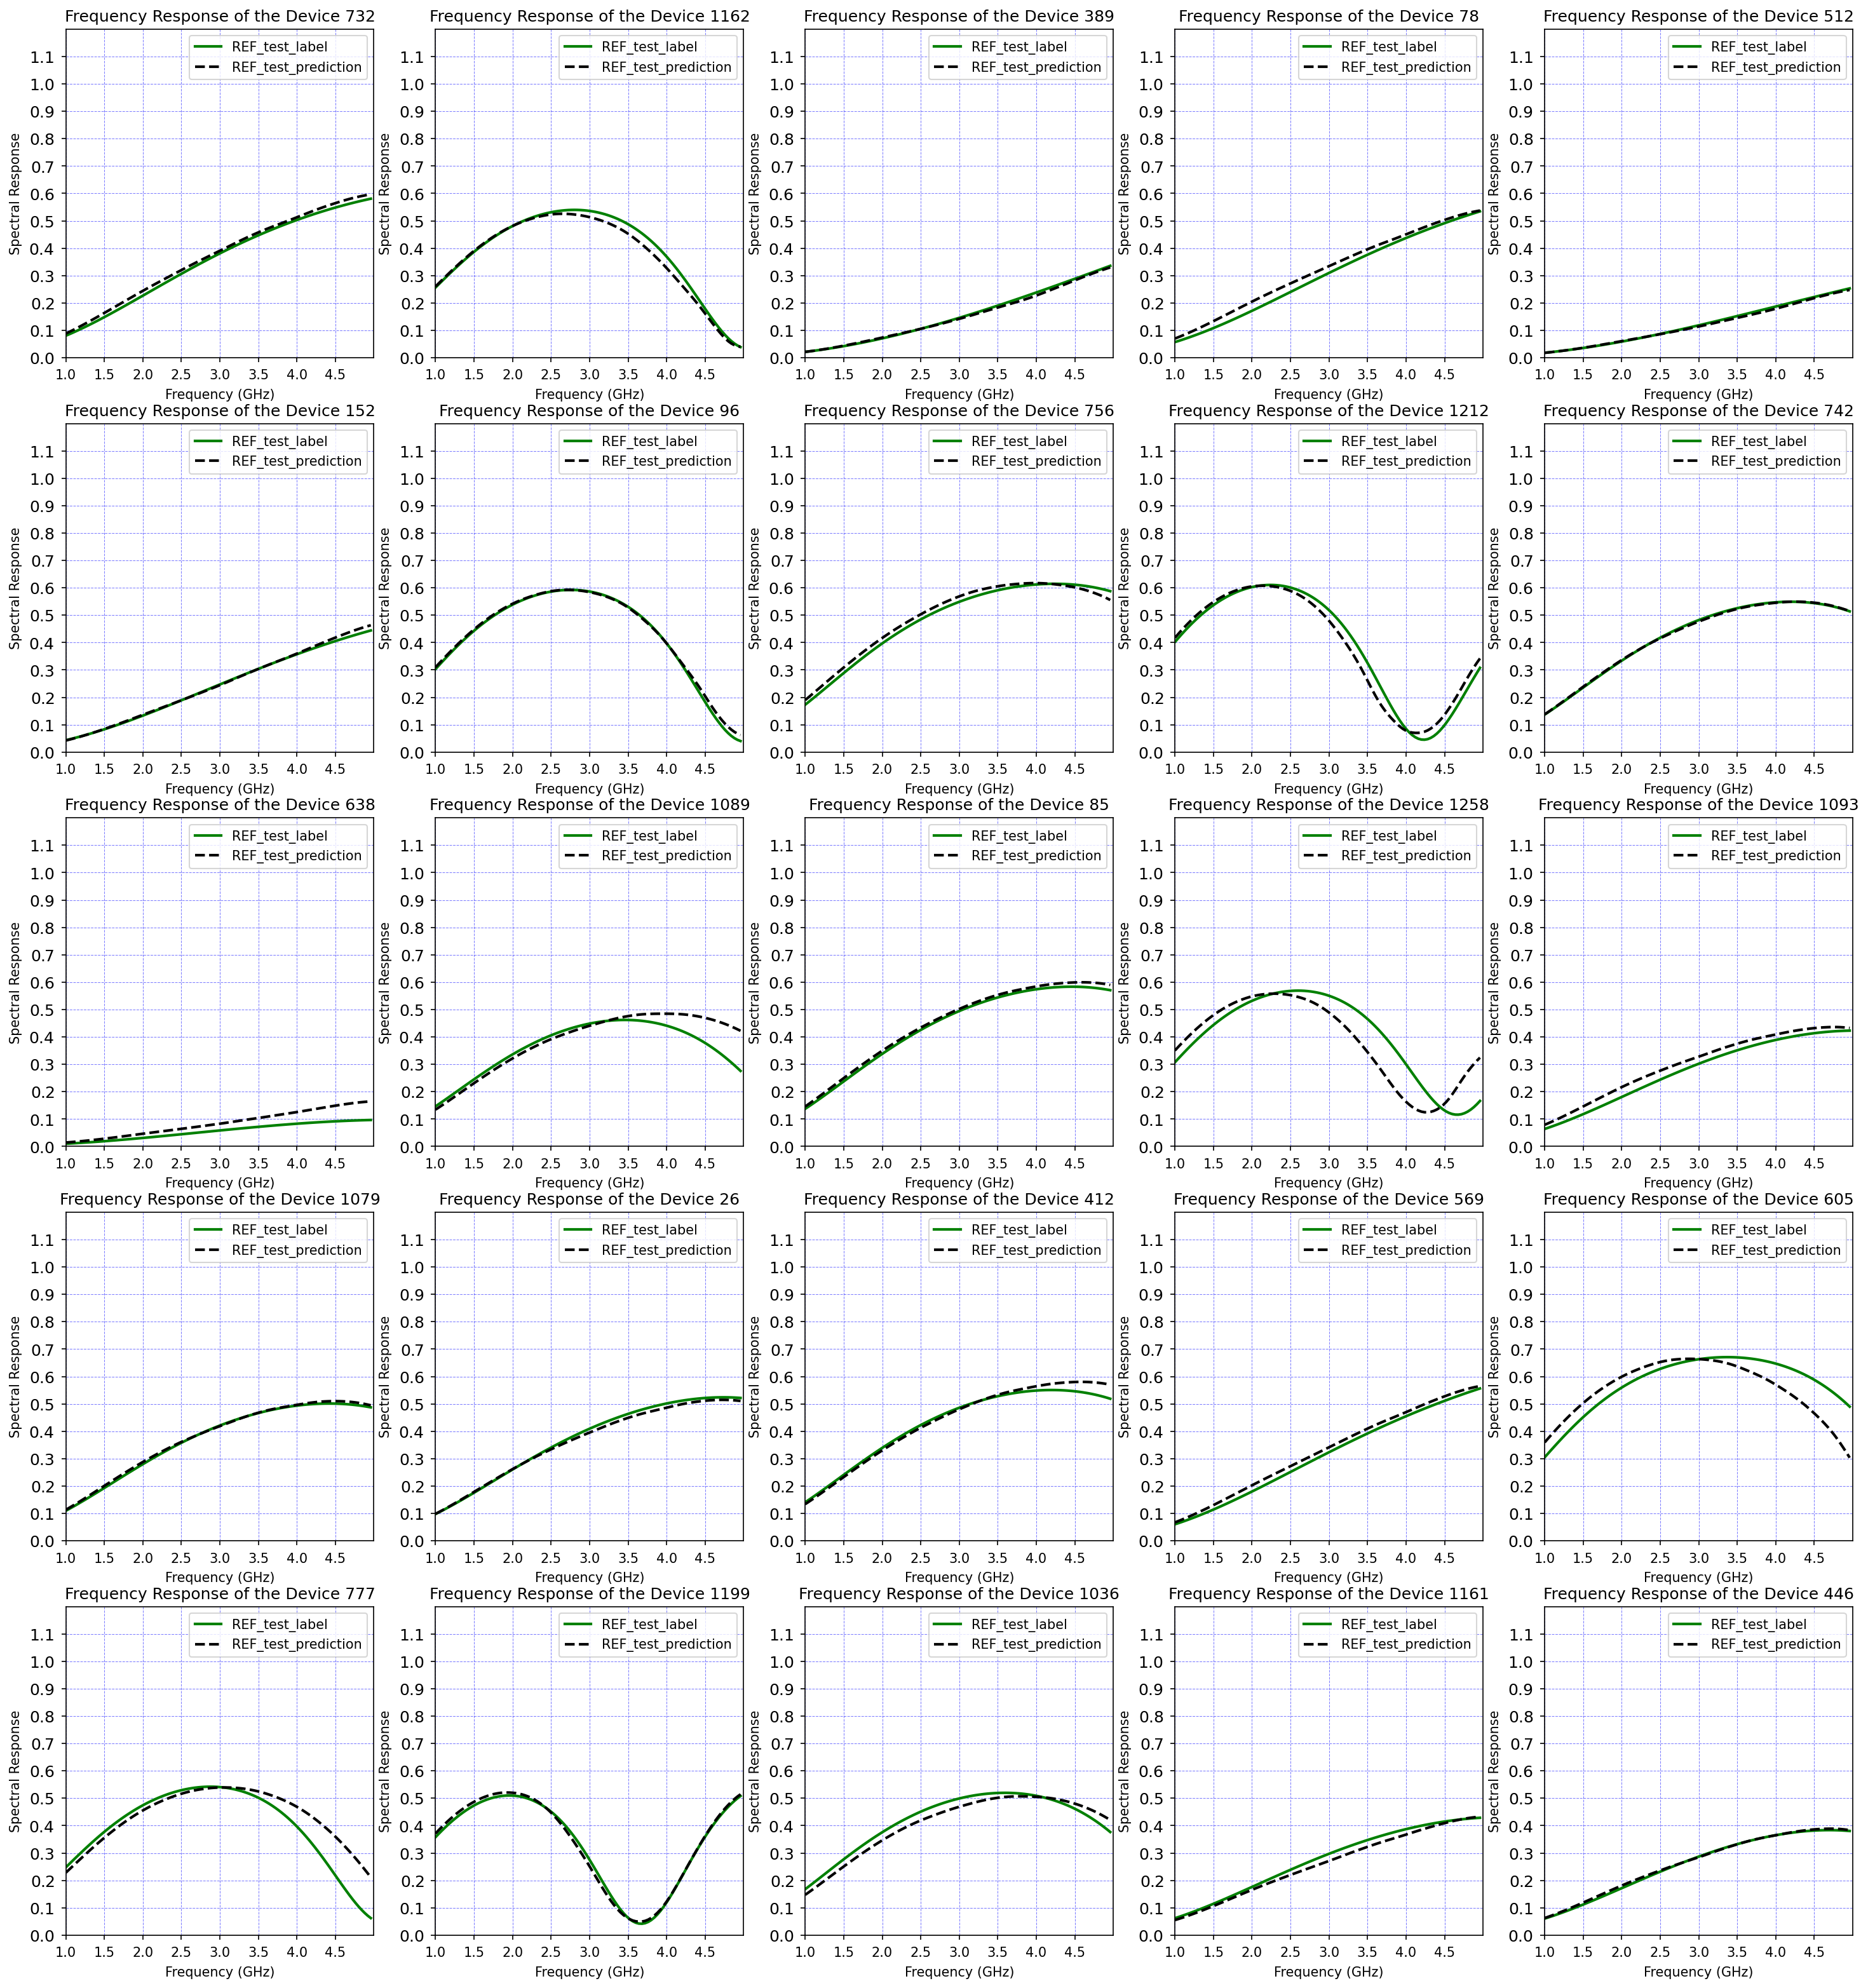

Number of seconds elapsed: 1.6571189000023878 seconds
Number of minutes elapsed: 0.02761864833337313 minutes
Number of hours elapsed: 0.00046031080555621886 hours


In [115]:
################################################
## PLOTTING PREDICTIONS VS. TEST LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
   
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Y_test[imageIndex,:], color ='green'  , lw=2,  ls='-', label = 'REF_test_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_test[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'REF_test_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")